In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [70]:
ce = pd.read_excel("CO2 data-1990-20.xlsx")

In [71]:
ce.head(40)

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
0,Last Updated Date,2022-07-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020.0,2021.0
3,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,0.992616,1.005027,1.016649,0.966589,0.948410,0.937926,0.917507,0.913618,NaN,NaN
5,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,0.259295,0.185624,0.146236,0.172897,0.149789,0.131695,0.163295,0.159824,NaN,NaN
6,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,0.480603,0.508099,0.515960,0.494065,0.499405,0.483140,0.486456,0.493923,NaN,NaN
7,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,0.950696,1.036294,1.099779,1.135044,1.031811,0.813301,0.777675,0.792137,NaN,NaN
8,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,1.503240,1.533630,1.668337,1.603775,1.557664,1.788786,1.782739,1.692248,NaN,NaN
9,Andorra,AND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,5.944654,5.942800,5.807128,6.026182,6.080600,6.104134,6.362975,6.481217,NaN,NaN


In [72]:
# Copy the original dataframe into a new one
df = ce.copy()
# Remove the redundant rows from the dataframe
df, df.columns = df[3:] , df.iloc[2]
df.drop(df.iloc[:, 1:5], inplace=True, axis=1)
df

2,Country Name,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
3,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.992616,1.005027,1.016649,0.966589,0.948410,0.937926,0.917507,0.913618,NaN,NaN
5,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.259295,0.185624,0.146236,0.172897,0.149789,0.131695,0.163295,0.159824,NaN,NaN
6,Africa Western and Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.480603,0.508099,0.515960,0.494065,0.499405,0.483140,0.486456,0.493923,NaN,NaN
7,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.950696,1.036294,1.099779,1.135044,1.031811,0.813301,0.777675,0.792137,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.858491,1.106688,1.062211,0.511362,0.399364,0.359622,0.341068,0.380633,NaN,NaN
266,South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.077958,8.138264,8.212241,7.669938,7.563739,7.641675,7.515679,7.507736,NaN,NaN
267,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.278601,0.284058,0.304550,0.312355,0.325115,0.404068,0.445489,0.380717,NaN,NaN


## Some Basic Data Exploration

In [73]:
df.shape

(266, 62)

In [74]:
df.dtypes

2
Country Name     object
1961.0          float64
1962.0          float64
1963.0          float64
1964.0          float64
                 ...   
2017.0          float64
2018.0          float64
2019.0          float64
2020.0          float64
2021.0          float64
Length: 62, dtype: object

In [75]:
df.describe()

2,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.375662,4.286836,4.198346,4.152282,4.155511,4.161985,4.138992,4.089567,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.953363,4.889850,4.774560,4.686689,4.640333,4.578774,4.480231,4.439935,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.040017,0.026979,0.029121,0.039370,0.030715,0.035013,0.037113,0.036986,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.784804,0.750497,0.802000,0.799460,0.784215,0.803291,0.819434,0.819559,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.869867,2.672439,2.758047,2.731323,2.756557,2.696077,2.913849,2.954129,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.330283,6.217697,6.007777,5.902288,5.839915,6.077849,6.024132,5.961174,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.188222,32.598940,33.205895,33.043510,32.745888,32.127990,31.067533,32.474469,NaN,NaN


In [76]:
df.corr()

2,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
2,,,,,,,,,,,,,,,,,,,,,
1961.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.984964,0.990424,0.993552,0.995750,0.998749,1.000000,0.998166,0.995216,NaN,NaN
2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.987010,0.990922,0.993232,0.993998,0.996782,0.998166,1.000000,0.996863,NaN,NaN
2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.982629,0.984890,0.989225,0.992371,0.994627,0.995216,0.996863,1.000000,NaN,NaN


## Removing Null values

In [77]:
# Check for null values
df.isnull().sum()

2
Country Name      0
1961.0          266
1962.0          266
1963.0          266
1964.0          266
               ... 
2017.0           27
2018.0           27
2019.0           27
2020.0          266
2021.0          266
Length: 62, dtype: int64

In [78]:
df = df.dropna(axis=1, how="all")
df

2,Country Name,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
3,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Africa Eastern and Southern,0.999038,0.953224,0.915661,0.916485,0.917093,0.936570,0.947393,0.967836,0.967182,...,1.021548,0.979352,0.992616,1.005027,1.016649,0.966589,0.948410,0.937926,0.917507,0.913618
5,Afghanistan,0.191745,0.167682,0.095958,0.084721,0.075546,0.068468,0.062588,0.056827,0.052691,...,0.243614,0.296506,0.259295,0.185624,0.146236,0.172897,0.149789,0.131695,0.163295,0.159824
6,Africa Western and Central,0.478144,0.530016,0.568305,0.523529,0.470888,0.501681,0.564390,0.549638,0.514868,...,0.472077,0.476789,0.480603,0.508099,0.515960,0.494065,0.499405,0.483140,0.486456,0.493923
7,Angola,0.553662,0.544539,0.543557,0.708984,0.836804,0.912141,1.072168,1.086637,1.091825,...,0.976184,0.985522,0.950696,1.036294,1.099779,1.135044,1.031811,0.813301,0.777675,0.792137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,"Yemen, Rep.",0.567037,0.690937,0.704793,0.627105,0.653256,0.706081,0.698158,0.728608,0.757433,...,1.098258,0.963978,0.858491,1.106688,1.062211,0.511362,0.399364,0.359622,0.341068,0.380633
266,South Africa,6.729799,6.424622,6.175430,6.219194,6.215847,6.378790,6.489192,6.723589,6.787424,...,8.304084,7.869816,8.077958,8.138264,8.212241,7.669938,7.563739,7.641675,7.515679,7.507736
267,Zambia,0.340930,0.349232,0.337224,0.289956,0.241270,0.234153,0.188442,0.238601,0.219937,...,0.195502,0.217497,0.278601,0.284058,0.304550,0.312355,0.325115,0.404068,0.445489,0.380717


In [79]:
df.reset_index(drop=True, inplace=True)
# Fill the missing values using KNN imputer
imputer = KNNImputer(n_neighbors=3)
# fit the imputer on the numeric columns of the dataframe
df_imputed = pd.DataFrame(
    imputer.fit_transform(df.iloc[:, 1:]),
    index=range(df.shape[0]),
    columns=df.columns[1:]
)
df.iloc[:, 1:] = df_imputed
df
# Currently not changing anything as the dataframe does not contain null values.

C:\Users\hp\AppData\Local\Temp\ipykernel_38156\2376356097.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:, 1:] = df_imputed


2,Country Name,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
0,Aruba,4.257973,4.157749,4.055572,3.972054,3.930550,4.010427,4.079973,4.115842,4.137589,...,4.333087,4.337205,4.375662,4.286836,4.198346,4.152282,4.155511,4.161985,4.138992,4.089567
1,Africa Eastern and Southern,0.999038,0.953224,0.915661,0.916485,0.917093,0.936570,0.947393,0.967836,0.967182,...,1.021548,0.979352,0.992616,1.005027,1.016649,0.966589,0.948410,0.937926,0.917507,0.913618
2,Afghanistan,0.191745,0.167682,0.095958,0.084721,0.075546,0.068468,0.062588,0.056827,0.052691,...,0.243614,0.296506,0.259295,0.185624,0.146236,0.172897,0.149789,0.131695,0.163295,0.159824
3,Africa Western and Central,0.478144,0.530016,0.568305,0.523529,0.470888,0.501681,0.564390,0.549638,0.514868,...,0.472077,0.476789,0.480603,0.508099,0.515960,0.494065,0.499405,0.483140,0.486456,0.493923
4,Angola,0.553662,0.544539,0.543557,0.708984,0.836804,0.912141,1.072168,1.086637,1.091825,...,0.976184,0.985522,0.950696,1.036294,1.099779,1.135044,1.031811,0.813301,0.777675,0.792137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,4.257973,4.157749,4.055572,3.972054,3.930550,4.010427,4.079973,4.115842,4.137589,...,4.333087,4.337205,4.375662,4.286836,4.198346,4.152282,4.155511,4.161985,4.138992,4.089567
262,"Yemen, Rep.",0.567037,0.690937,0.704793,0.627105,0.653256,0.706081,0.698158,0.728608,0.757433,...,1.098258,0.963978,0.858491,1.106688,1.062211,0.511362,0.399364,0.359622,0.341068,0.380633
263,South Africa,6.729799,6.424622,6.175430,6.219194,6.215847,6.378790,6.489192,6.723589,6.787424,...,8.304084,7.869816,8.077958,8.138264,8.212241,7.669938,7.563739,7.641675,7.515679,7.507736
264,Zambia,0.340930,0.349232,0.337224,0.289956,0.241270,0.234153,0.188442,0.238601,0.219937,...,0.195502,0.217497,0.278601,0.284058,0.304550,0.312355,0.325115,0.404068,0.445489,0.380717


In [80]:
df.describe()

2,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,4.238084,4.148901,4.115721,4.034333,3.989959,3.996111,4.065355,4.101148,4.107533,4.088421,...,4.333087,4.337205,4.375662,4.286836,4.198346,4.152282,4.155511,4.161985,4.138992,4.089567
std,5.044303,5.028945,4.972502,4.986952,5.028280,4.931695,5.056884,5.224307,5.207752,5.261468,...,4.754384,4.711530,4.694244,4.634054,4.524795,4.441520,4.397590,4.339250,4.245863,4.207675
min,0.001183,0.001158,0.001130,0.001100,0.001071,0.001043,0.000000,0.000991,0.035567,0.036699,...,0.034580,0.040186,0.040017,0.026979,0.029121,0.039370,0.030715,0.035013,0.037113,0.036986
25%,0.556740,0.592117,0.602859,0.631983,0.637689,0.678340,0.690265,0.715546,0.750953,0.746656,...,0.803360,0.830846,0.837266,0.865046,0.865555,0.913823,0.931634,0.910883,0.902308,0.930565
50%,2.524652,2.531218,2.532144,2.614876,2.482529,2.637747,2.713953,2.848335,2.805496,2.684296,...,3.421149,3.502104,3.737786,3.649578,3.581788,3.596470,3.488621,3.648361,3.527501,3.591645
75%,6.204296,6.218646,5.645922,5.464344,5.012181,5.163885,5.387176,5.413118,5.469565,5.300760,...,5.756701,5.979182,6.088155,5.746487,5.612524,5.657650,5.527446,5.648624,5.613285,5.519221
max,30.195189,31.778496,29.632441,33.122025,36.466263,37.102174,40.074177,47.429575,48.045021,50.833850,...,32.634302,33.494413,34.188222,32.598940,33.205895,33.043510,32.745888,32.127990,31.067533,32.474469


In [81]:
df.corr()

2,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
2,,,,,,,,,,,,,,,,,,,,,
1990.0,1.000000,0.987259,0.976885,0.962404,0.949335,0.938726,0.929902,0.909021,0.901921,0.887592,...,0.883535,0.876454,0.868136,0.878131,0.871641,0.868112,0.869255,0.873323,0.867432,0.857188
1991.0,0.987259,1.000000,0.960818,0.950039,0.942013,0.933041,0.928307,0.911572,0.902959,0.891021,...,0.867352,0.861338,0.855641,0.864469,0.860370,0.856877,0.857863,0.861521,0.854986,0.847490
1992.0,0.976885,0.960818,1.000000,0.994808,0.984864,0.975790,0.967525,0.949837,0.946597,0.936365,...,0.930133,0.923108,0.916689,0.921073,0.914026,0.912016,0.911024,0.911586,0.907322,0.902896
1993.0,0.962404,0.950039,0.994808,1.000000,0.995595,0.988268,0.982530,0.969018,0.964884,0.956847,...,0.938013,0.929754,0.923550,0.926740,0.922256,0.921262,0.920425,0.920148,0.915126,0.913980
1994.0,0.949335,0.942013,0.984864,0.995595,1.000000,0.996646,0.993488,0.983464,0.979290,0.972920,...,0.941061,0.931785,0.927407,0.930591,0.928292,0.928570,0.928389,0.927524,0.921331,0.921039
1995.0,0.938726,0.933041,0.975790,0.988268,0.996646,1.000000,0.997887,0.990940,0.987981,0.981682,...,0.943254,0.934701,0.932222,0.935486,0.934799,0.936885,0.937362,0.936430,0.929780,0.930038
1996.0,0.929902,0.928307,0.967525,0.982530,0.993488,0.997887,1.000000,0.995160,0.992022,0.986031,...,0.942419,0.933064,0.929744,0.933107,0.933261,0.935573,0.935781,0.934190,0.927359,0.927227
1997.0,0.909021,0.911572,0.949837,0.969018,0.983464,0.990940,0.995160,1.000000,0.997935,0.995082,...,0.938852,0.931762,0.929339,0.931139,0.933800,0.937017,0.937350,0.935432,0.928421,0.930254
1998.0,0.901921,0.902959,0.946597,0.964884,0.979290,0.987981,0.992022,0.997935,1.000000,0.997806,...,0.937821,0.931359,0.930078,0.931013,0.933812,0.937993,0.937448,0.934740,0.927713,0.930654


## Exploratory Data Analysis

In [82]:
sns.set(rc={'figure.figsize':(11.7, 60)})

In [83]:
# Plot the mean of the data for each country
df_mean = pd.concat([df.iloc[:, 0], df.iloc[:, 1:].mean(axis=1)], axis=1)
df_mean = df_mean.fillna(0)

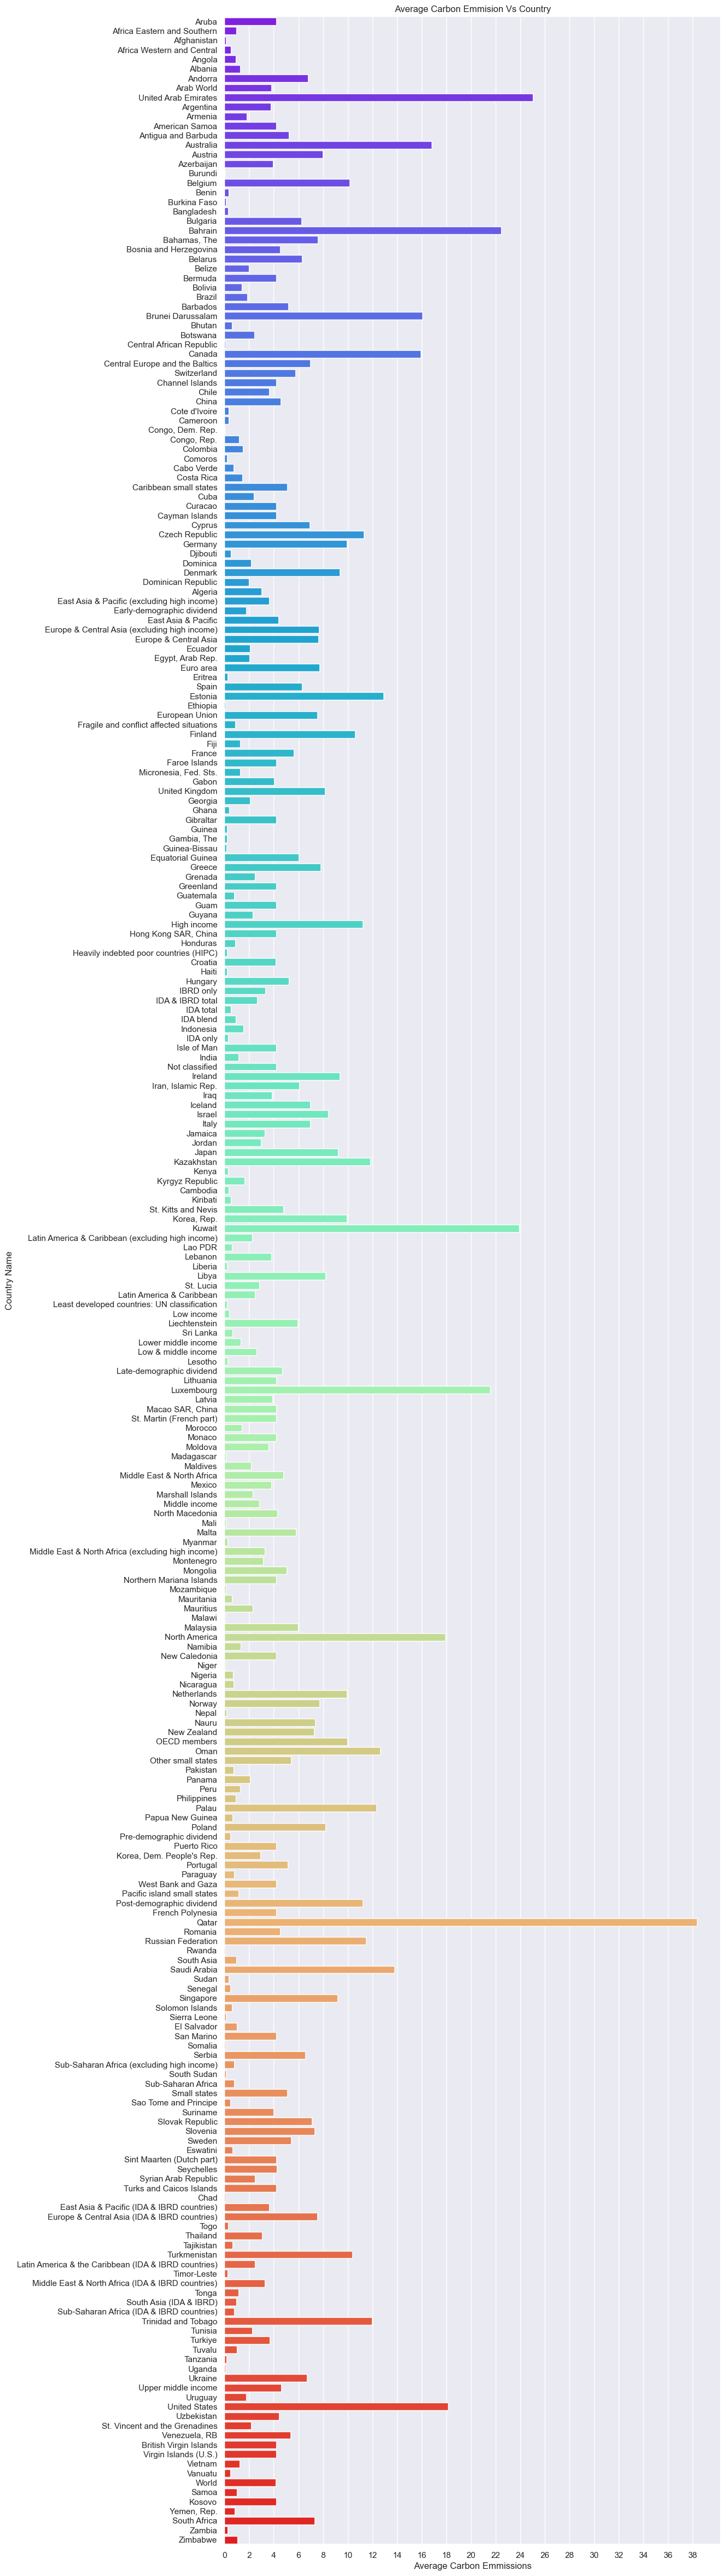

In [84]:
sns.barplot(data=df_mean, y="Country Name", x=0, palette="rainbow");
plt.xlabel("Average Carbon Emmissions");
plt.ylabel("Country Name");
plt.title("Average Carbon Emmision Vs Country");
plt.xticks(range(0, 40, 2));

In [85]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})

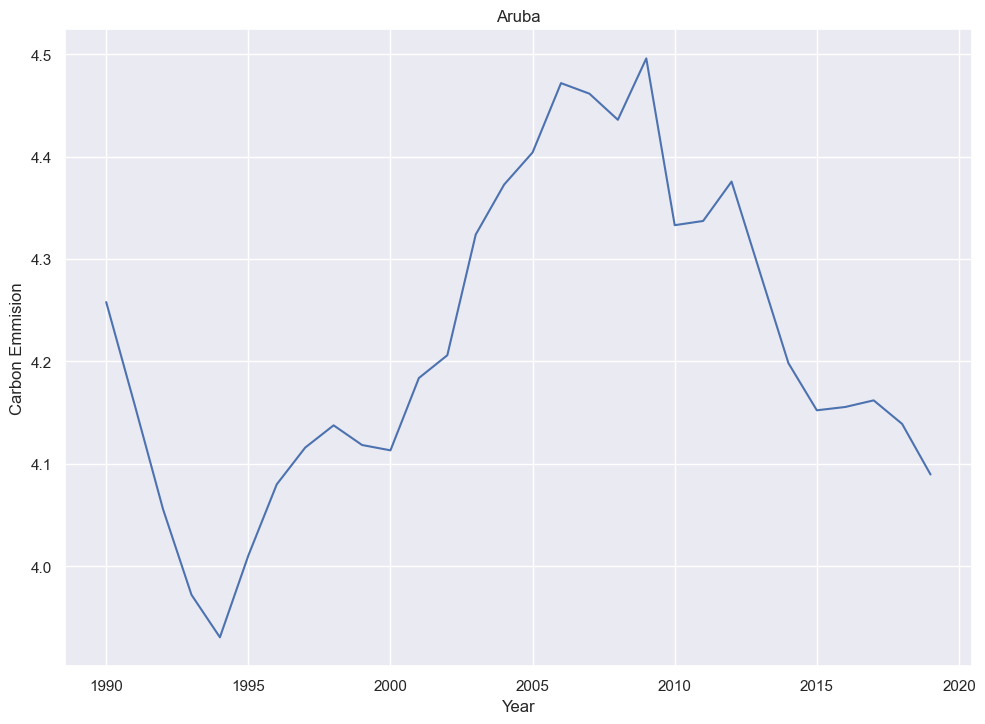

In [86]:
# Plot the carbon emmisions per country as a time series data
sns.lineplot(x=df.loc[0].index[1:], y=[i for i in df.loc[0]][1:]);
plt.xlabel("Year");
plt.ylabel("Carbon Emmision");
plt.title("Aruba");

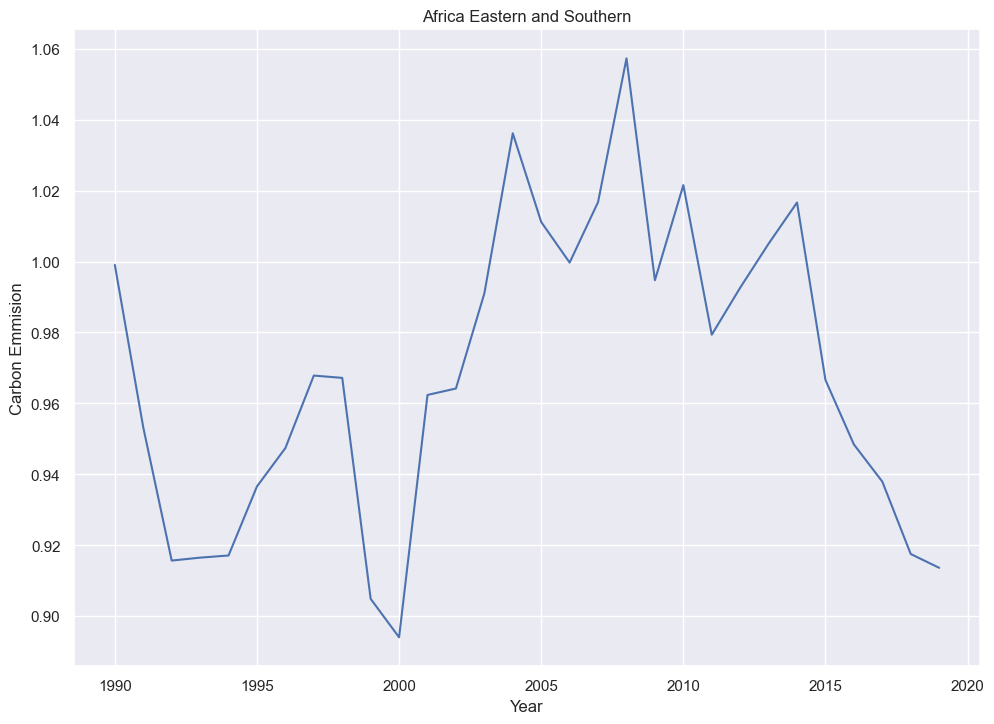

In [87]:
# Plot the carbon emmisions per country as a time series data
sns.lineplot(x=df.loc[1].index[1:], y=[i for i in df.loc[1]][1:]);
plt.xlabel("Year");
plt.ylabel("Carbon Emmision");
plt.title("Africa Eastern and Southern");

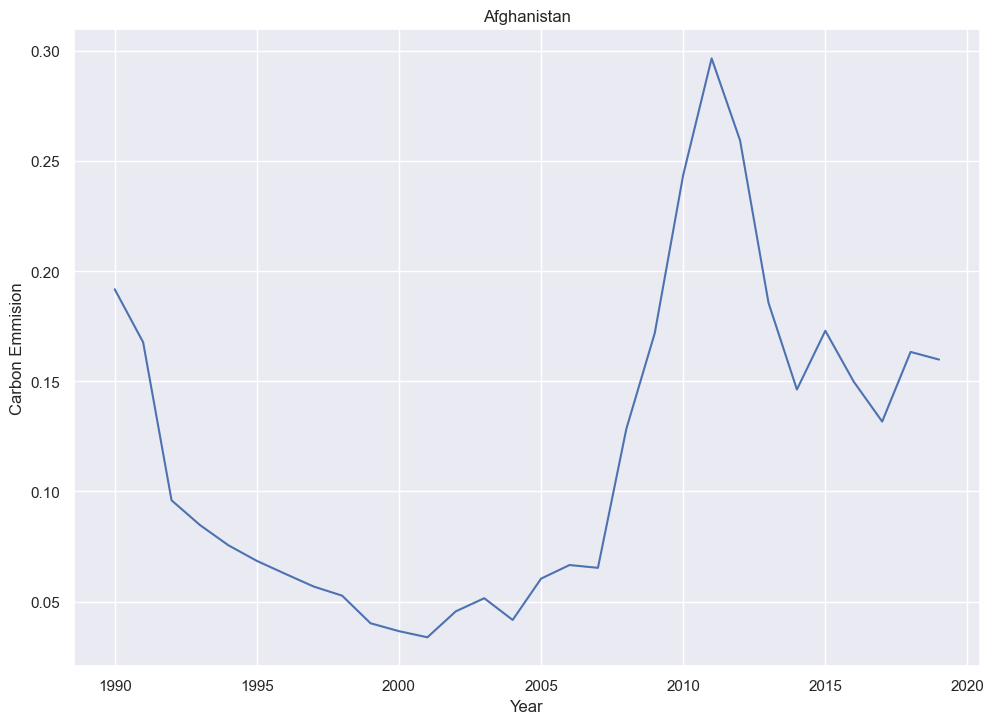

In [88]:
# Plot the carbon emmisions per country as a time series data
sns.lineplot(x=df.loc[2].index[1:], y=[i for i in df.loc[2]][1:]);
plt.xlabel("Year");
plt.ylabel("Carbon Emmision");
plt.title("Afghanistan");

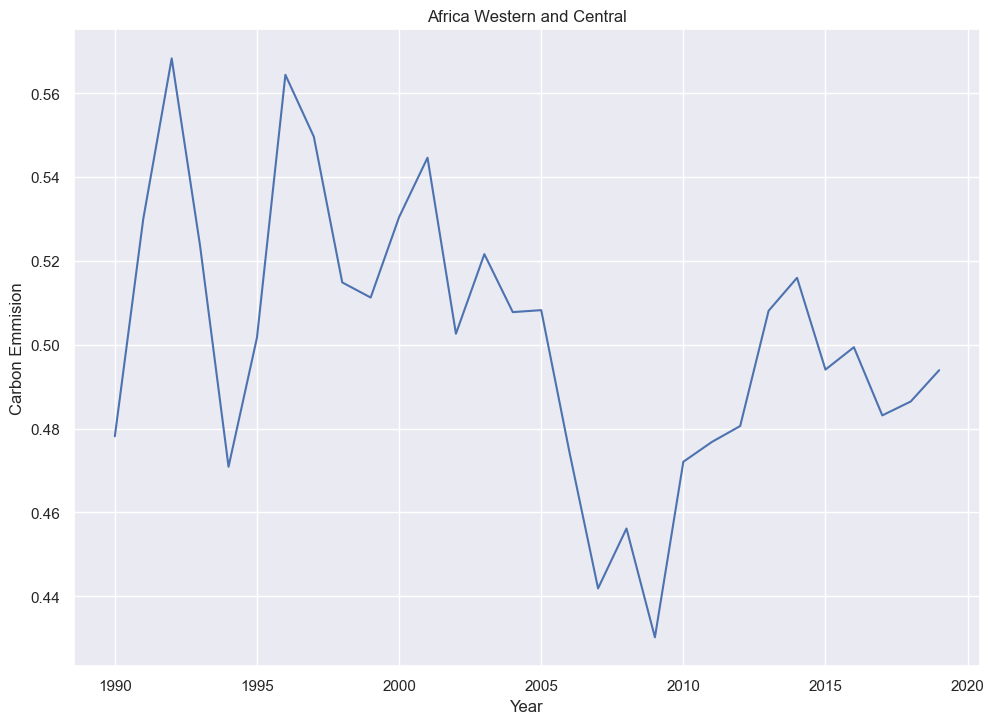

In [89]:
# Plot the carbon emmisions per country as a time series data
sns.lineplot(x=df.loc[3].index[1:], y=[i for i in df.loc[3]][1:]);
plt.xlabel("Year");
plt.ylabel("Carbon Emmision");
plt.title("Africa Western and Central");

In [90]:
sns.set(rc={'figure.figsize':(11.7, 60)})

In [91]:
# Plot the mean of the data for each country
df_coeff_var = pd.concat([df.iloc[:, 0], df.iloc[:, 1:].std(axis=1) / df.iloc[:, 1:].mean(axis=1)], axis=1)
df_coeff_var = df_coeff_var.fillna(0)

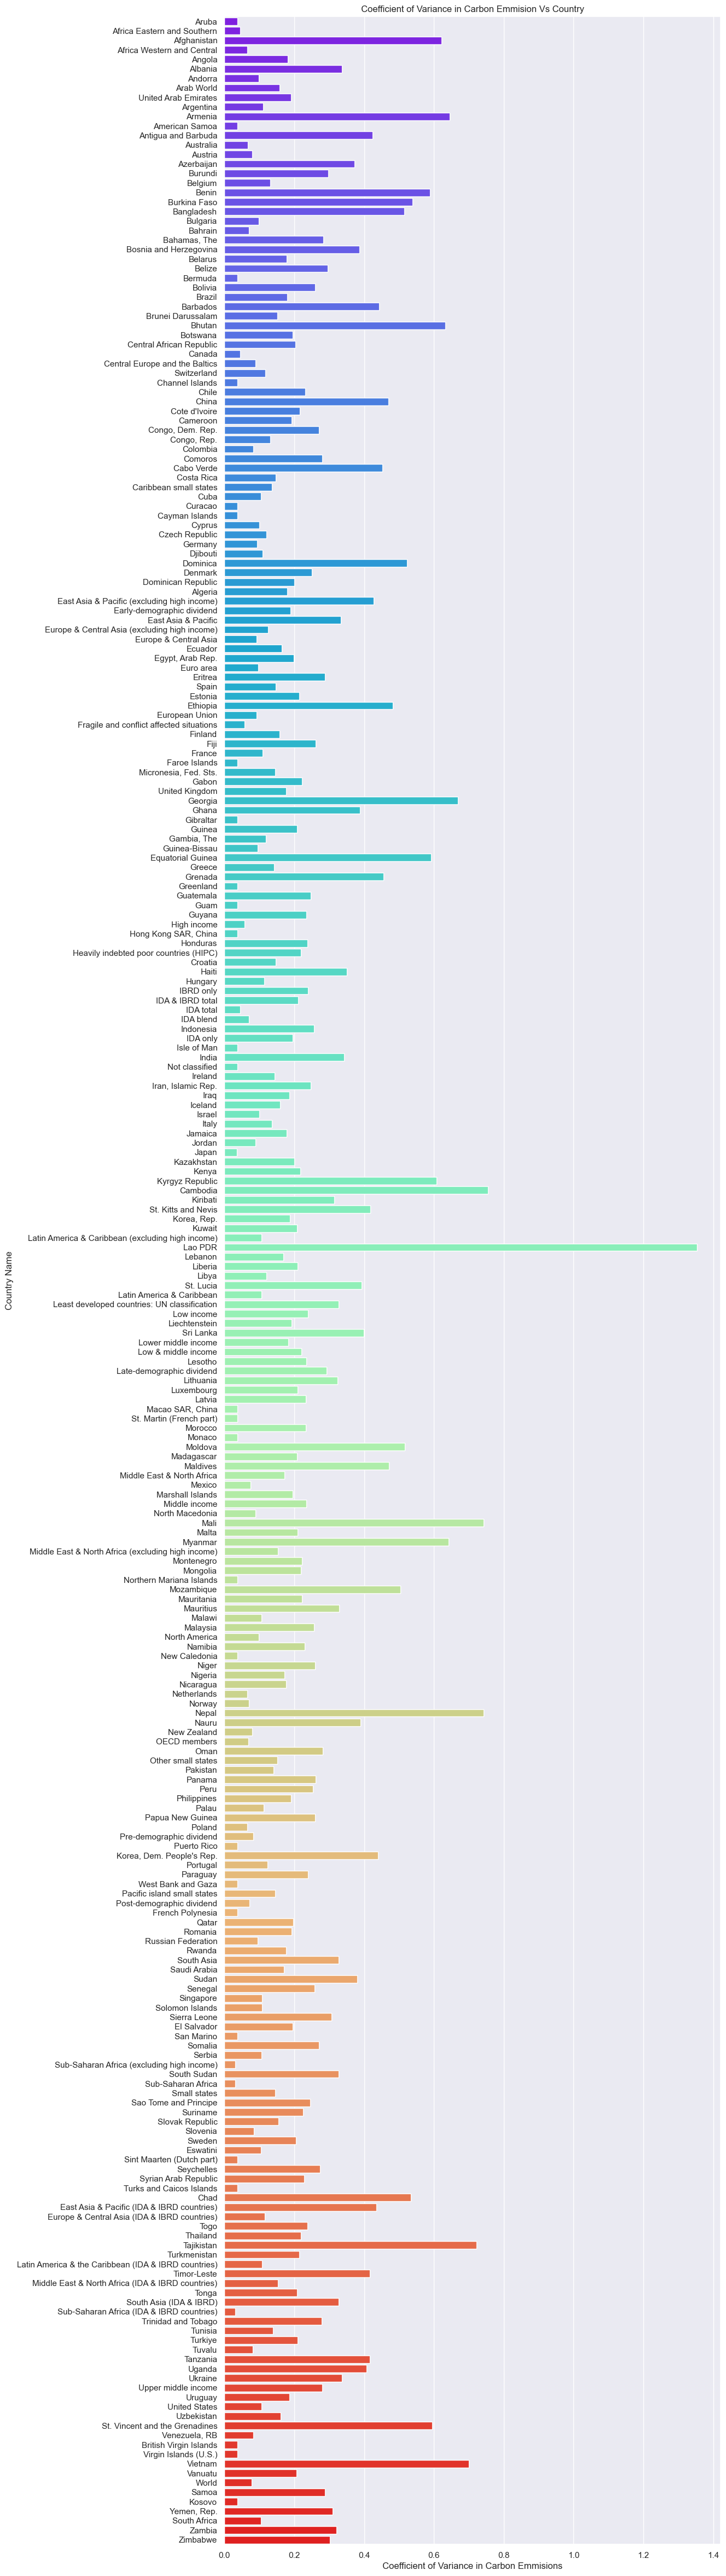

In [92]:
sns.barplot(data=df_coeff_var, y="Country Name", x=0, palette="rainbow");
plt.xlabel("Coefficient of Variance in Carbon Emmisions");
plt.ylabel("Country Name");
plt.title("Coefficient of Variance in Carbon Emmision Vs Country");

In [93]:
sns.set(rc={'figure.figsize':(10, 10)})

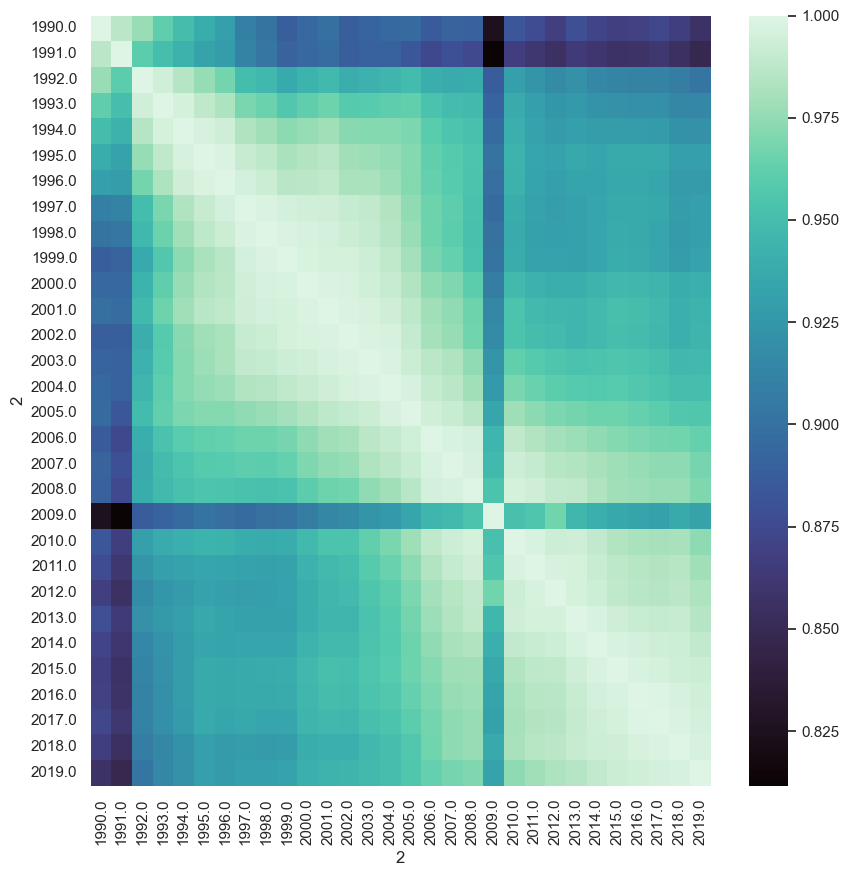

In [94]:
sns.heatmap(data=df.corr(), cmap="mako");

Something has happened in 2009

Some Year wise aggregated plots

In [95]:
sns.set(rc={'figure.figsize':(10, 7)})

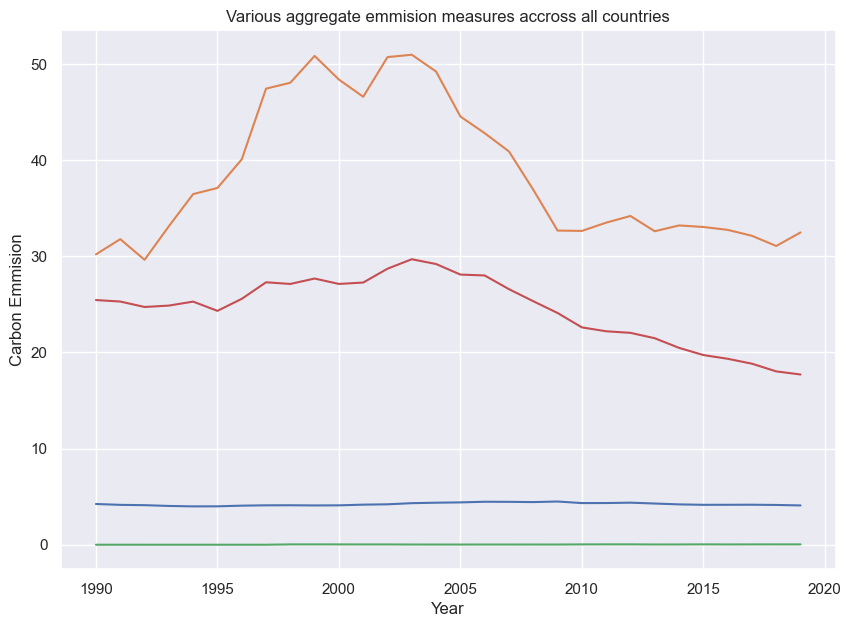

In [96]:
# Now I will make some year wise plots
df_mean_per_year = pd.DataFrame(df.loc[:, [*range(1990, 2020)]].mean())
sns.lineplot(data=df_mean_per_year, x=df_mean_per_year.index, y=0);
df_max_per_year = pd.DataFrame(df.loc[:, [*range(1990, 2020)]].max())
sns.lineplot(data=df_max_per_year, x=df_max_per_year.index, y=0);
df_min_per_year = pd.DataFrame(df.loc[:, [*range(1990, 2020)]].min())
sns.lineplot(data=df_min_per_year, x=df_min_per_year.index, y=0);
df_var_per_year = pd.DataFrame(df.loc[:, [*range(1990, 2020)]].var())
sns.lineplot(data=df_var_per_year, x=df_var_per_year.index, y=0);
plt.xlabel("Year");
plt.ylabel("Carbon Emmision");
plt.title("Various aggregate emmision measures accross all countries");

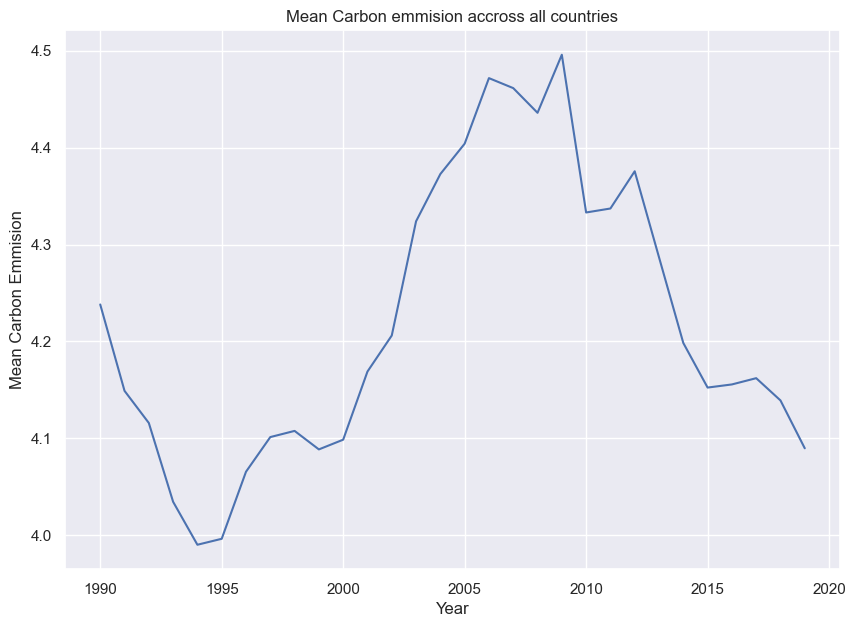

In [97]:
sns.lineplot(data=df_mean_per_year, x=df_mean_per_year.index, y=0);
plt.xlabel("Year");
plt.ylabel("Mean Carbon Emmision");
plt.title("Mean Carbon emmision accross all countries");

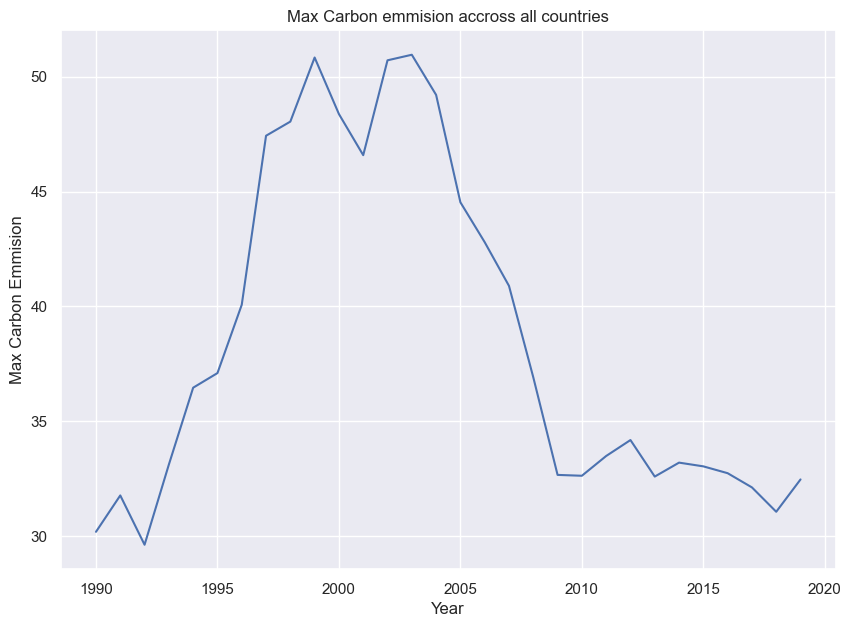

In [98]:
sns.lineplot(data=df_max_per_year, x=df_max_per_year.index, y=0);
plt.xlabel("Year");
plt.ylabel("Max Carbon Emmision");
plt.title("Max Carbon emmision accross all countries");

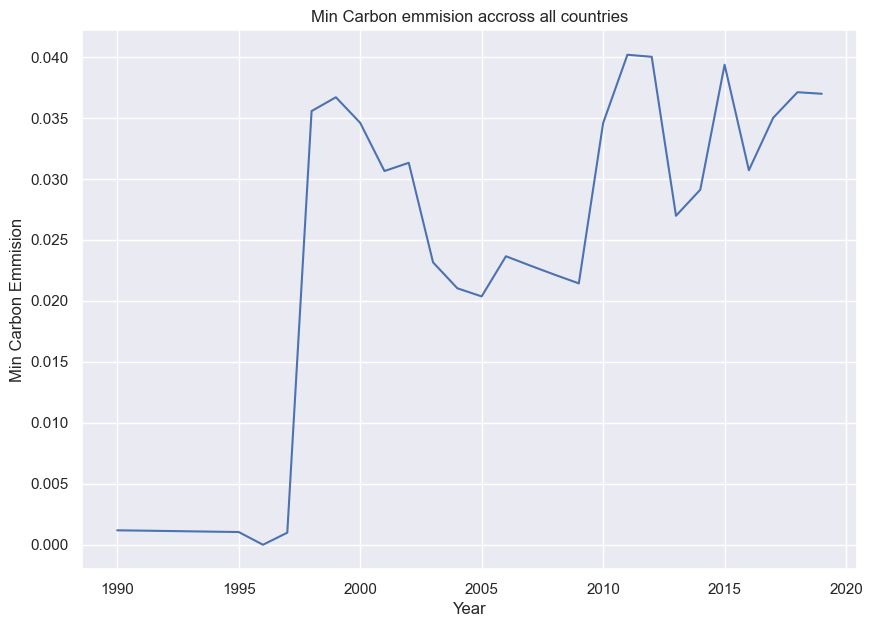

In [99]:
sns.lineplot(data=df_min_per_year, x=df_min_per_year.index, y=0);
plt.xlabel("Year");
plt.ylabel("Min Carbon Emmision");
plt.title("Min Carbon emmision accross all countries");

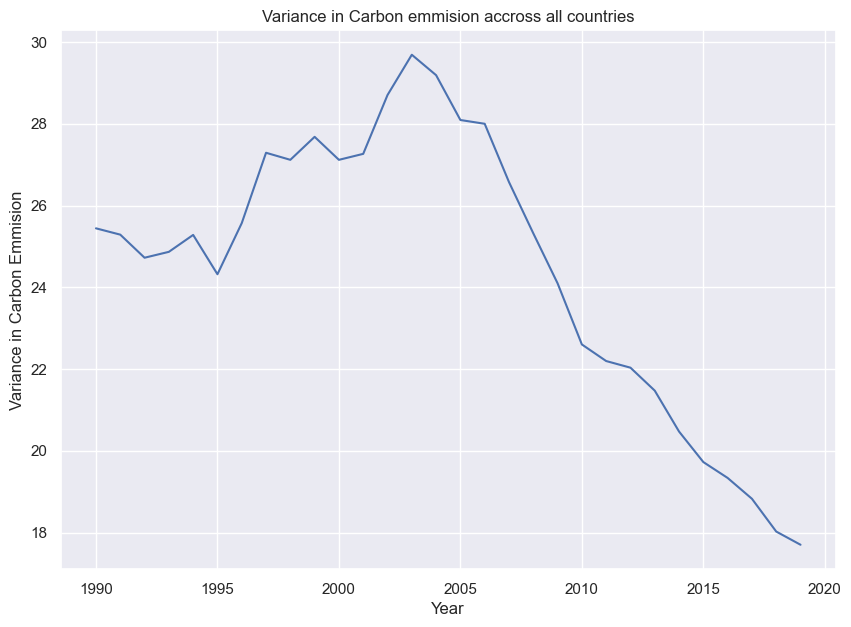

In [100]:
sns.lineplot(data=df_var_per_year, x=df_var_per_year.index, y=0);
plt.xlabel("Year");
plt.ylabel("Variance in Carbon Emmision");
plt.title("Variance in Carbon emmision accross all countries");

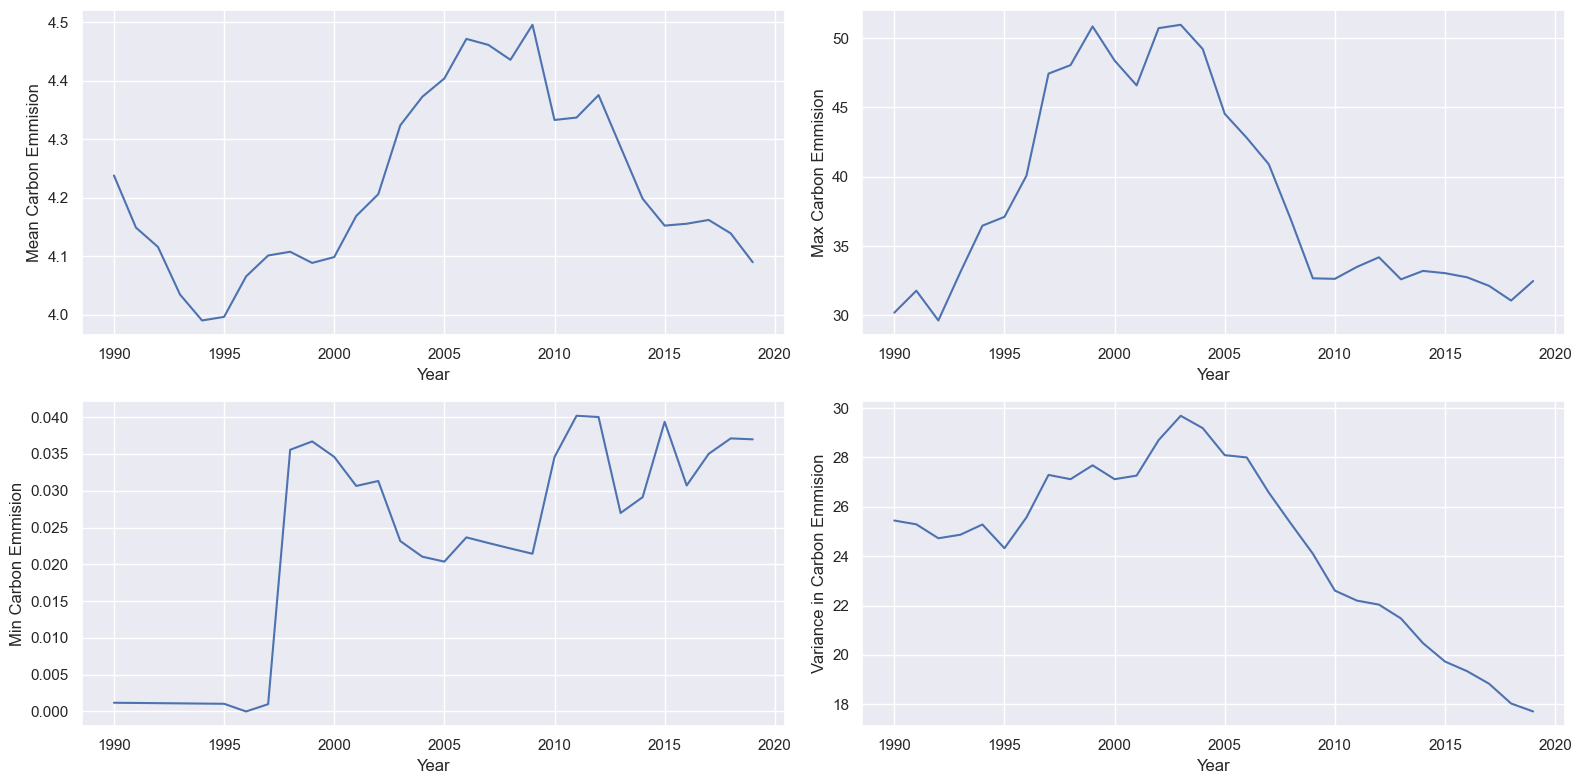

In [101]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
sns.lineplot(ax=axes[0, 0], data=df_mean_per_year, x=df_mean_per_year.index, y=0);
sns.lineplot(ax=axes[0, 1], data=df_max_per_year, x=df_max_per_year.index, y=0);
sns.lineplot(ax=axes[1, 0], data=df_min_per_year, x=df_min_per_year.index, y=0);
sns.lineplot(ax=axes[1, 1], data=df_var_per_year, x=df_var_per_year.index, y=0);
axes[0, 0].set(xlabel='Year', ylabel='Mean Carbon Emmision');
axes[0, 1].set(xlabel='Year', ylabel='Max Carbon Emmision');
axes[1, 0].set(xlabel='Year', ylabel='Min Carbon Emmision');
axes[1, 1].set(xlabel='Year', ylabel='Variance in Carbon Emmision');
plt.tight_layout()

In [102]:
countries = pd.read_csv("countries of the world.csv")

In [103]:
countries.head(20)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,"9,7","0,13",0,"191,19",1900.0,"42,0","7,8","2,41","0,24","97,35",NaN,"45,11","24,2","0,096","0,658","0,246"
6,Anguilla,LATIN AMER. & CARIB,13477,102,"132,1","59,80","10,76","21,03",8600.0,"95,0","460,0",0,0,100,2,"14,17","5,34","0,04","0,18","0,78"
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,"156,0","34,54","-6,15","19,46",11000.0,"89,0","549,9","18,18","4,55","77,27",2,"16,93","5,37","0,038","0,22","0,743"
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,"14,4","0,18","0,61","15,18",11200.0,"97,1","220,4","12,31","0,48","87,21",3,"16,73","7,55","0,095","0,358","0,547"
9,Armenia,C.W. OF IND. STATES,2976372,29800,"99,9","0,00","-6,47","23,28",3500.0,"98,6","195,7","17,55","2,3","80,15",4,"12,07","8,23","0,239","0,343","0,418"


## Some Basic Data Exploration

In [104]:
countries.shape

(227, 20)

In [105]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

### Converting Strings to Numerical Values

In [106]:
countries.replace(",", ".", regex=True, inplace=True)
countries["Country"] = countries["Country"].str.strip()

In [107]:
for col in countries.columns.values[2:]:
    countries[col] = pd.to_numeric(countries[col])

In [108]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [109]:
countries.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

### Removing NULL values using KNN imputer

In [110]:
countries.reset_index(drop=True, inplace=True)
# Fill the missing values using KNN imputer
imputer = KNNImputer(n_neighbors=3)
# fit the imputer on the numeric columns of the dataframe
countries_imputed = pd.DataFrame(
    imputer.fit_transform(countries.iloc[:, 2:]),
    index=range(countries.shape[0]),
    columns=countries.columns[2:]
)
countries.iloc[:, 2:] = countries_imputed
countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500.0,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380000,0.240000,0.380000
1,Albania,EASTERN EUROPE,3581655.0,28748.0,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232000,0.188000,0.579000
2,Algeria,NORTHERN AFRICA,32930091.0,2381740.0,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101000,0.600000,0.298000
3,American Samoa,OCEANIA,57794.0,199.0,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.177333,0.232333,0.590667
4,Andorra,WESTERN EUROPE,71201.0,468.0,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.026000,0.150000,0.824333


In [111]:
countries.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

### Further Exploration

In [112]:
countries.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.090323,35.245492,9710.572687,83.247871,235.891777,13.746197,4.613421,81.640029,2.152717,22.109266,9.204626,0.147347,0.275800,0.575800
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.894104,35.227784,10031.753706,19.156378,226.245826,12.994930,8.380234,16.082182,0.688561,11.108575,4.960208,0.142951,0.136156,0.166303
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.905000,8.215000,1900.000000,75.866667,38.500000,3.380000,0.190000,71.985000,2.000000,12.725000,5.910000,0.038000,0.189000,0.443500
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,20.910000,5600.000000,92.500000,176.200000,10.380000,1.080000,85.700000,2.000000,18.790000,7.840000,0.096000,0.259000,0.582000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,1.025000,55.335000,15700.000000,97.900000,382.900000,20.000000,4.495000,95.230000,3.000000,29.770000,10.580000,0.211000,0.335000,0.687500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [113]:
countries.corr()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Population,1.000000,0.469985,-0.028190,-0.068199,-0.002599,0.024756,-0.039802,-0.048054,-0.030592,0.188976,-0.061762,-0.120506,-0.030906,-0.044840,-0.026375,0.006351,0.109423,-0.093203
Area (sq. mi.),0.469985,1.000000,-0.066917,-0.095627,0.043489,-0.005074,0.071759,0.032594,0.053898,-0.078284,-0.144855,0.138756,-0.123387,-0.066409,0.042080,-0.040376,0.131265,-0.071758
Pop. Density (per sq. mi.),-0.028190,-0.066917,1.000000,0.241690,0.174704,-0.142404,0.195182,0.094667,0.279748,-0.081545,-0.031171,0.082139,0.046704,-0.158865,-0.068320,-0.109698,-0.142624,0.249103
Coastline (coast/area ratio),-0.068199,-0.095627,0.241690,1.000000,-0.128810,-0.137120,0.048489,0.125568,0.151220,-0.122339,0.341146,-0.078907,-0.013841,-0.075401,-0.163067,-0.054268,-0.219839,0.238679
Net migration,-0.002599,0.043489,0.174704,-0.128810,1.000000,-0.030272,0.373343,-0.018855,0.237414,-0.061742,-0.310733,0.211808,-0.005958,-0.066875,0.025416,-0.131167,-0.066903,0.176333
Infant mortality (per 1000 births),0.024756,-0.005074,-0.142404,-0.137120,-0.030272,1.000000,-0.597307,-0.748471,-0.667772,-0.109619,-0.059899,0.119808,-0.360043,0.843291,0.656449,0.708868,0.035729,-0.635704
GDP ($ per capita),-0.039802,0.071759,0.195182,0.048489,0.373343,-0.597307,1.000000,0.512703,0.832576,0.017841,-0.224872,0.102745,0.312474,-0.650021,-0.199421,-0.574486,-0.042733,0.535215
Literacy (%),-0.048054,0.032594,0.094667,0.125568,-0.018855,-0.748471,0.512703,1.000000,0.581833,0.081356,0.030143,-0.081432,0.388776,-0.773431,-0.375570,-0.590305,0.022807,0.486498
Phones (per 1000),-0.030592,0.053898,0.279748,0.151220,0.237414,-0.667772,0.832576,0.581833,1.000000,0.055914,-0.158627,0.037497,0.388781,-0.721995,-0.257665,-0.587402,-0.176249,0.661510
Arable (%),0.188976,-0.078284,-0.081545,-0.122339,-0.061742,-0.109619,0.017841,0.081356,0.055914,1.000000,0.089794,-0.854790,0.370863,-0.182270,0.058626,-0.021448,-0.028949,0.050140


## EDA

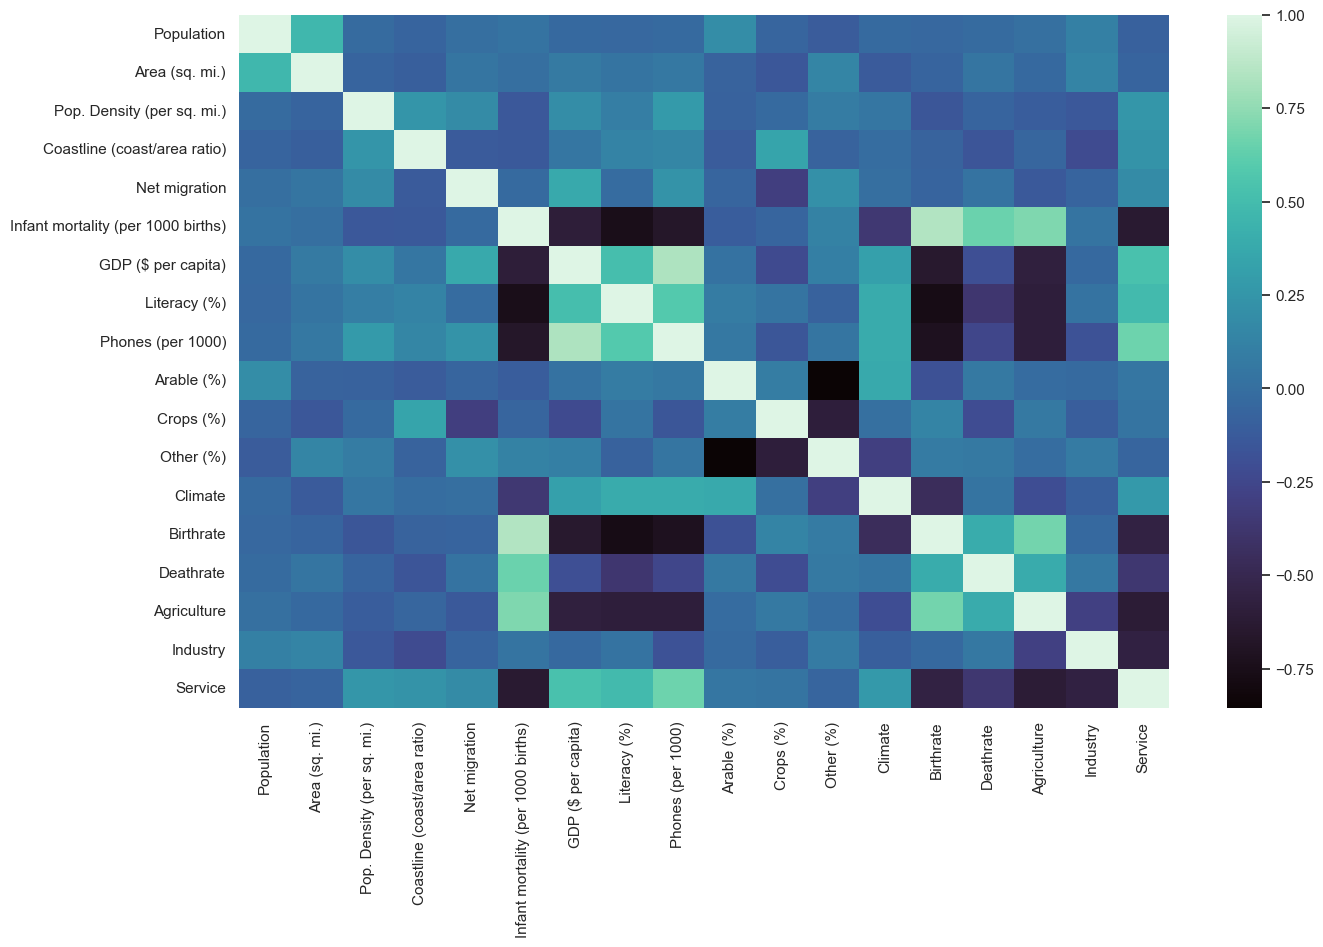

In [141]:
sns.heatmap(countries.corr(), cmap="mako");

### Selecting Some Countries for Feature Engineering

In [115]:
country_list = [
    "Australia",
    "Bhutan",
    "China",
    "Canada",
    "France"
    "India",
    "Italy",
    "Qatar",
    "United States",
]

In [116]:
countries_final = countries[countries["Country"].isin(country_list)]
countries_final.reset_index(inplace=True, drop=True)
countries_final

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Australia,OCEANIA,2.026408e+07,7686850.0,2.6,0.34,3.98,4.69,29000.0,100.0,565.5,6.55,0.04,93.41,1.000000,12.14,7.51,0.038,0.262,0.700
1,Bhutan,ASIA (EX. NEAR EAST),2.279723e+06,47000.0,48.5,0.00,0.00,100.44,1300.0,42.2,14.3,3.09,0.43,96.48,2.000000,33.65,12.70,0.258,0.379,0.363
2,Canada,NORTHERN AMERICA,3.309893e+07,9984670.0,3.3,2.02,5.96,4.75,29800.0,97.0,552.2,4.96,0.02,95.02,1.166667,10.78,7.80,0.022,0.294,0.684
3,China,ASIA (EX. NEAR EAST),1.313974e+09,9596960.0,136.9,0.15,-0.40,24.18,5000.0,90.9,266.7,15.40,1.25,83.35,1.500000,13.25,6.97,0.125,0.473,0.403
4,Italy,WESTERN EUROPE,5.813351e+07,301230.0,193.0,2.52,2.07,5.94,26700.0,98.6,430.9,27.79,9.53,62.68,3.000000,8.72,10.40,0.021,0.291,0.688
5,Qatar,NEAR EAST,8.853590e+05,11437.0,77.4,4.92,16.29,18.61,21500.0,82.5,232.0,1.64,0.27,98.09,1.000000,15.56,4.72,0.002,0.801,0.197
6,United States,NORTHERN AMERICA,2.984442e+08,9631420.0,31.0,0.21,3.41,6.50,37800.0,97.0,898.0,19.13,0.22,80.65,3.000000,14.14,8.26,0.010,0.204,0.787


In [117]:
countries_final_ce = df[df["Country Name"].isin(country_list)]
countries_final_ce.reset_index(inplace=True, drop=True)

In [133]:
countries_final["Mean CE"] = countries_final_ce.iloc[:, 1:].mean(axis=1)
countries_final.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_38156\3502281159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_final["Mean CE"] = countries_final_ce.iloc[:, 1:].mean(axis=1)


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Mean CE
0,Australia,OCEANIA,2.026408e+07,7686850.0,2.6,0.34,3.98,4.69,29000.0,100.0,...,6.55,0.04,93.41,1.000000,12.14,7.51,0.038,0.262,0.700,16.827027
1,Bhutan,ASIA (EX. NEAR EAST),2.279723e+06,47000.0,48.5,0.00,0.00,100.44,1300.0,42.2,...,3.09,0.43,96.48,2.000000,33.65,12.70,0.258,0.379,0.363,0.595520
2,Canada,NORTHERN AMERICA,3.309893e+07,9984670.0,3.3,2.02,5.96,4.75,29800.0,97.0,...,4.96,0.02,95.02,1.166667,10.78,7.80,0.022,0.294,0.684,15.921150
3,China,ASIA (EX. NEAR EAST),1.313974e+09,9596960.0,136.9,0.15,-0.40,24.18,5000.0,90.9,...,15.40,1.25,83.35,1.500000,13.25,6.97,0.125,0.473,0.403,4.550064
4,Italy,WESTERN EUROPE,5.813351e+07,301230.0,193.0,2.52,2.07,5.94,26700.0,98.6,...,27.79,9.53,62.68,3.000000,8.72,10.40,0.021,0.291,0.688,6.935887


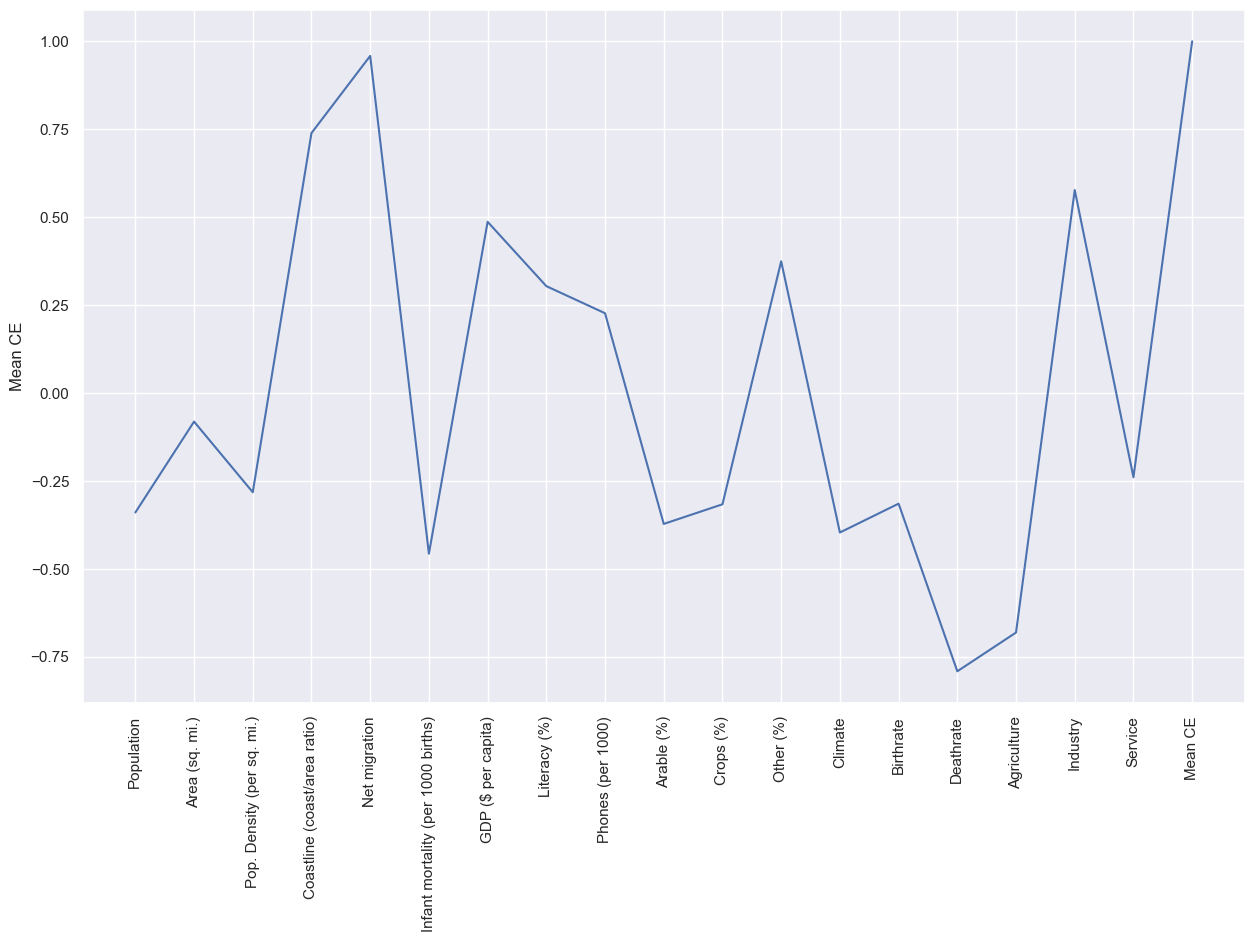

In [140]:
sns.lineplot(data=countries_final.corr()["Mean CE"])
plt.xticks(rotation=90);

In [118]:
analysis_df = pd.DataFrame()
analysis_df["Country"] = countries_final["Country"]
# df.iloc[:, 1:].mean(axis=1)
mean_ce = countries_final_ce.iloc[:, 1:].mean(axis=1)
analysis_df["CE(mean)"] = mean_ce
analysis_df["CE/Area(Metric Tons)"] = mean_ce / countries_final["Area (sq. mi.)"]
analysis_df["CE/GDP"] = mean_ce / countries_final["GDP ($ per capita)"]
analysis_df["CE/Population"] = mean_ce / countries_final["Population"]
analysis_df["CE/Literacy"] = mean_ce / countries_final["Literacy (%)"]
analysis_df["CE/Crop"] = mean_ce / countries_final["Crops (%)"]
analysis_df["CE/Industry"] = mean_ce / countries_final["Industry"]
analysis_df["CE/Service"] = mean_ce / countries_final["Service"]
analysis_df["CE/Climate"] = mean_ce / countries_final["Climate"]
analysis_df["CE/Agriculture"] = mean_ce / countries_final["Agriculture"]
analysis_df["CE/Phones"] = mean_ce / countries_final["Phones (per 1000)"]
analysis_df["CE/Arable"] = mean_ce / countries_final["Arable (%)"]

In [119]:
std_scaler = StandardScaler()
analysis_df.iloc[:, 1:] = pd.DataFrame(std_scaler.fit_transform(analysis_df.iloc[:, 1:].to_numpy()), columns=analysis_df.columns.values[1:])

# EDA

In [120]:
sns.set(rc={'figure.figsize':(10, 7)})

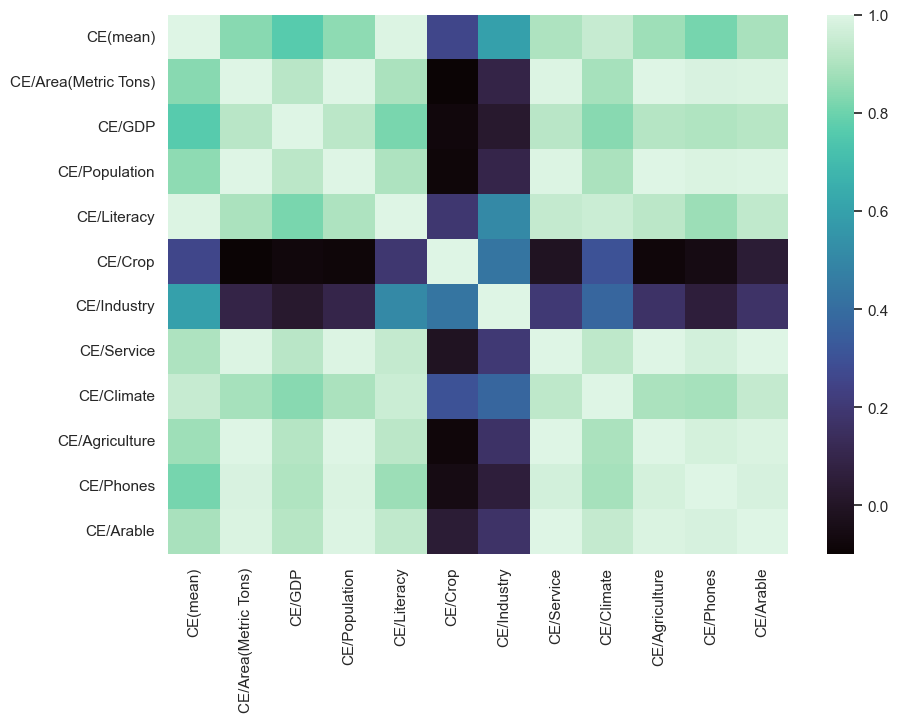

In [121]:
sns.heatmap(data=analysis_df.corr(), cmap="mako");

In [122]:
sns.set(rc={'figure.figsize':(12, 9)})

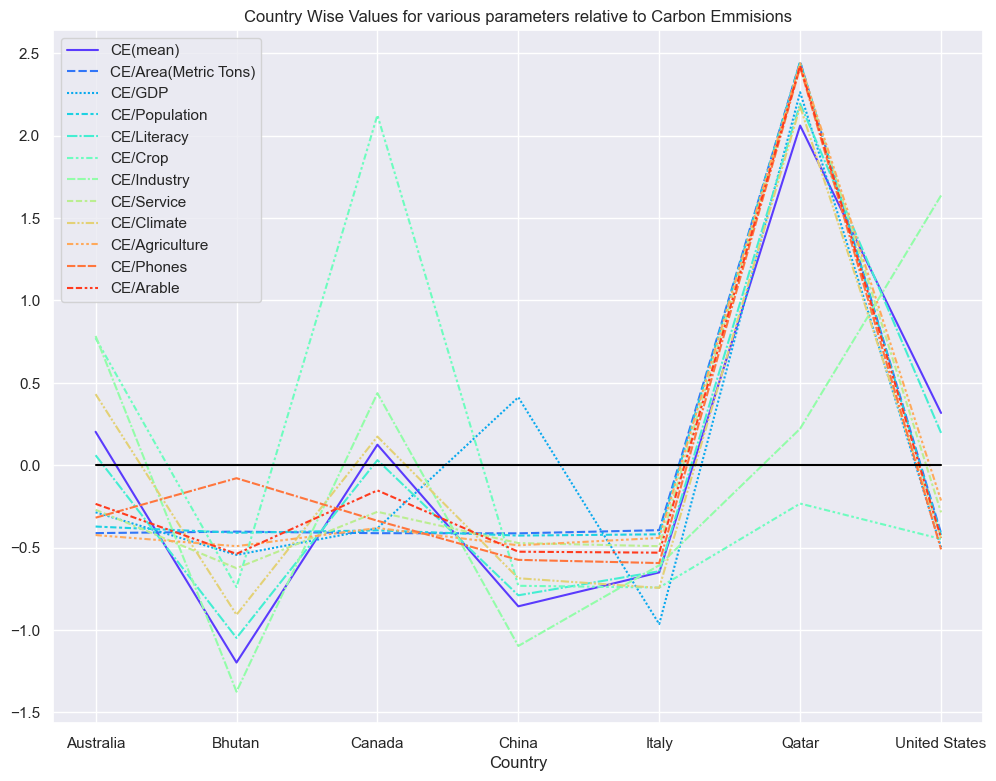

In [123]:
sns.lineplot(data=analysis_df, palette="rainbow")
sns.lineplot(data=[0] * 7, color="black")
plt.xticks(labels=analysis_df.Country, ticks=range(0, 7))
plt.xlabel("Country")
plt.title("Country Wise Values for various parameters relative to Carbon Emmisions");

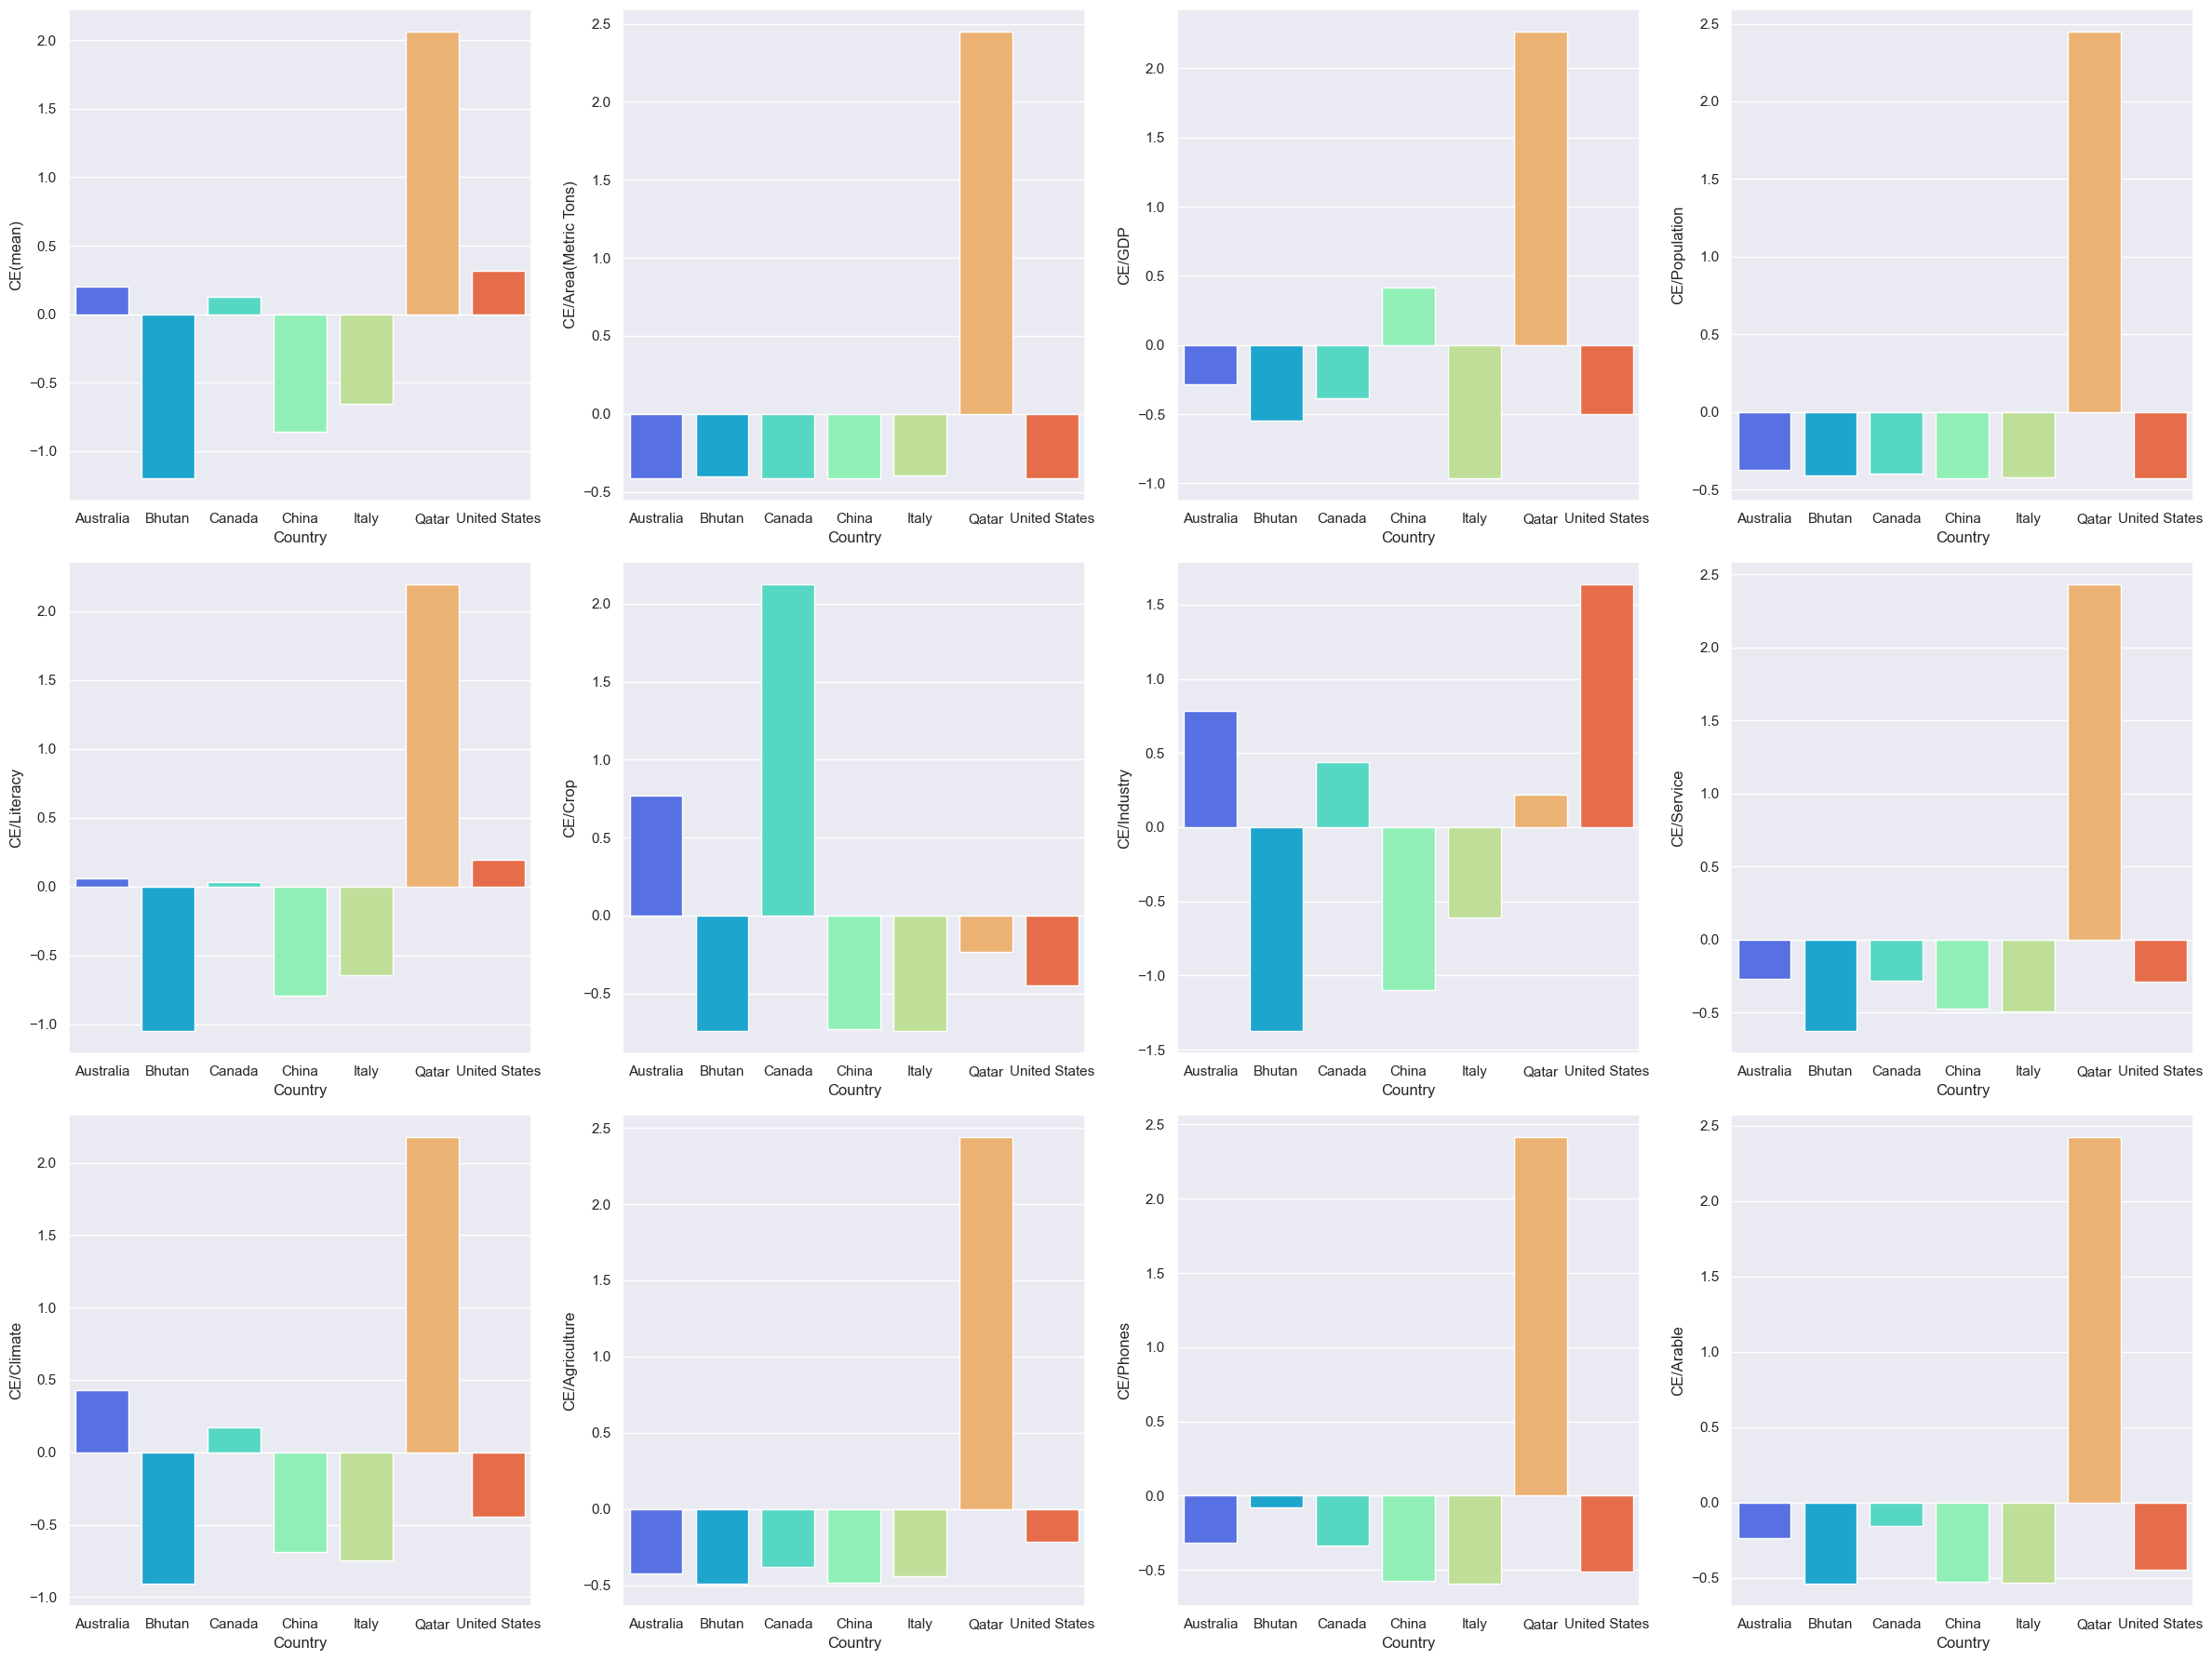

In [124]:
fig, axes = plt.subplots(3, 4, figsize=(24, 18))
sns.barplot(ax=axes[0, 0], data=analysis_df, x="Country", y="CE(mean)", palette="rainbow");
sns.barplot(ax=axes[0, 1], data=analysis_df, x="Country", y="CE/Area(Metric Tons)", palette="rainbow");
sns.barplot(ax=axes[0, 2], data=analysis_df, x="Country", y="CE/GDP", palette="rainbow");
sns.barplot(ax=axes[0, 3], data=analysis_df, x="Country", y="CE/Population", palette="rainbow");
sns.barplot(ax=axes[1, 0], data=analysis_df, x="Country", y="CE/Literacy", palette="rainbow");
sns.barplot(ax=axes[1, 1], data=analysis_df, x="Country", y="CE/Crop", palette="rainbow");
sns.barplot(ax=axes[1, 2], data=analysis_df, x="Country", y="CE/Industry", palette="rainbow");
sns.barplot(ax=axes[1, 3], data=analysis_df, x="Country", y="CE/Service", palette="rainbow");
sns.barplot(ax=axes[2, 0], data=analysis_df, x="Country", y="CE/Climate", palette="rainbow");
sns.barplot(ax=axes[2, 1], data=analysis_df, x="Country", y="CE/Agriculture", palette="rainbow");
sns.barplot(ax=axes[2, 2], data=analysis_df, x="Country", y="CE/Phones", palette="rainbow");
sns.barplot(ax=axes[2, 3], data=analysis_df, x="Country", y="CE/Arable", palette="rainbow");
plt.tight_layout()

## Using Min-Max Scaling Instead of Standard Scaling

In [125]:
min_max_scaler = MinMaxScaler()
analysis_df.iloc[:, 1:] = pd.DataFrame(min_max_scaler.fit_transform(analysis_df.iloc[:, 1:].to_numpy()), columns=analysis_df.columns.values[1:])

In [126]:
sns.set(rc={'figure.figsize':(15, 9)})

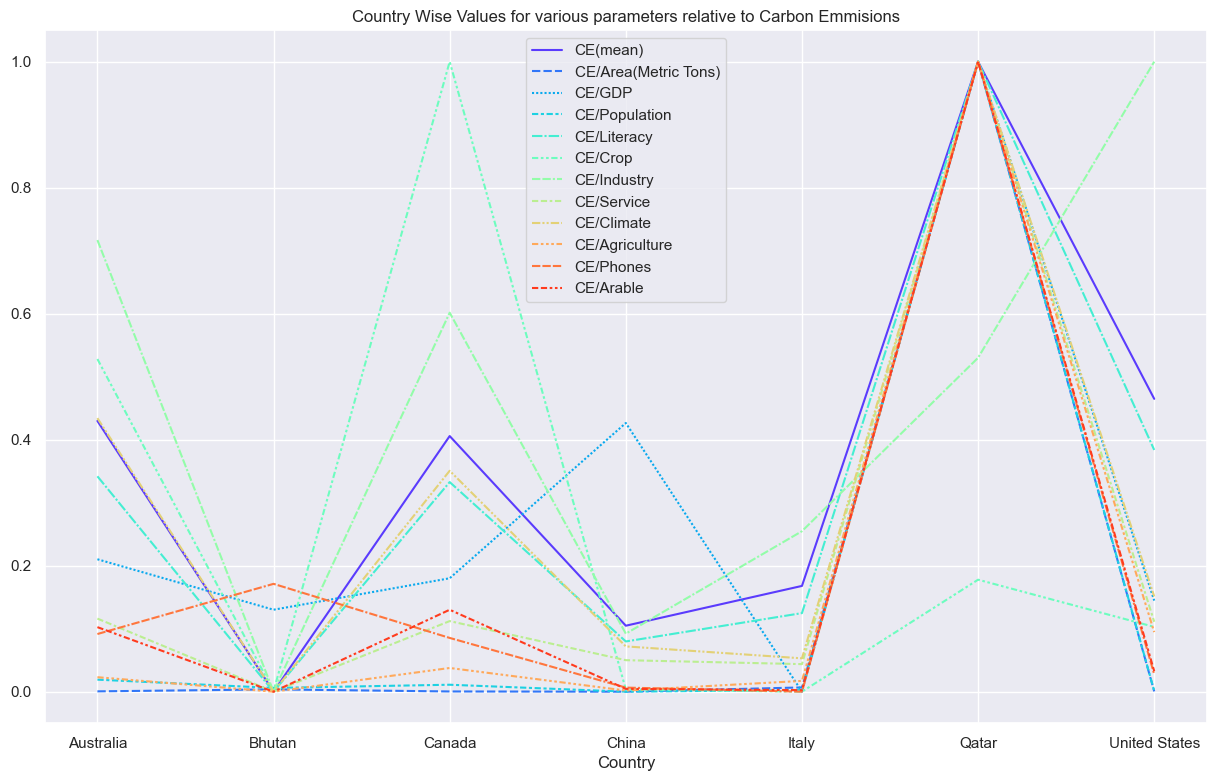

In [127]:
sns.lineplot(data=analysis_df, palette="rainbow")
plt.xticks(labels=analysis_df.Country, ticks=range(0, 7))
plt.xlabel("Country")
plt.title("Country Wise Values for various parameters relative to Carbon Emmisions");

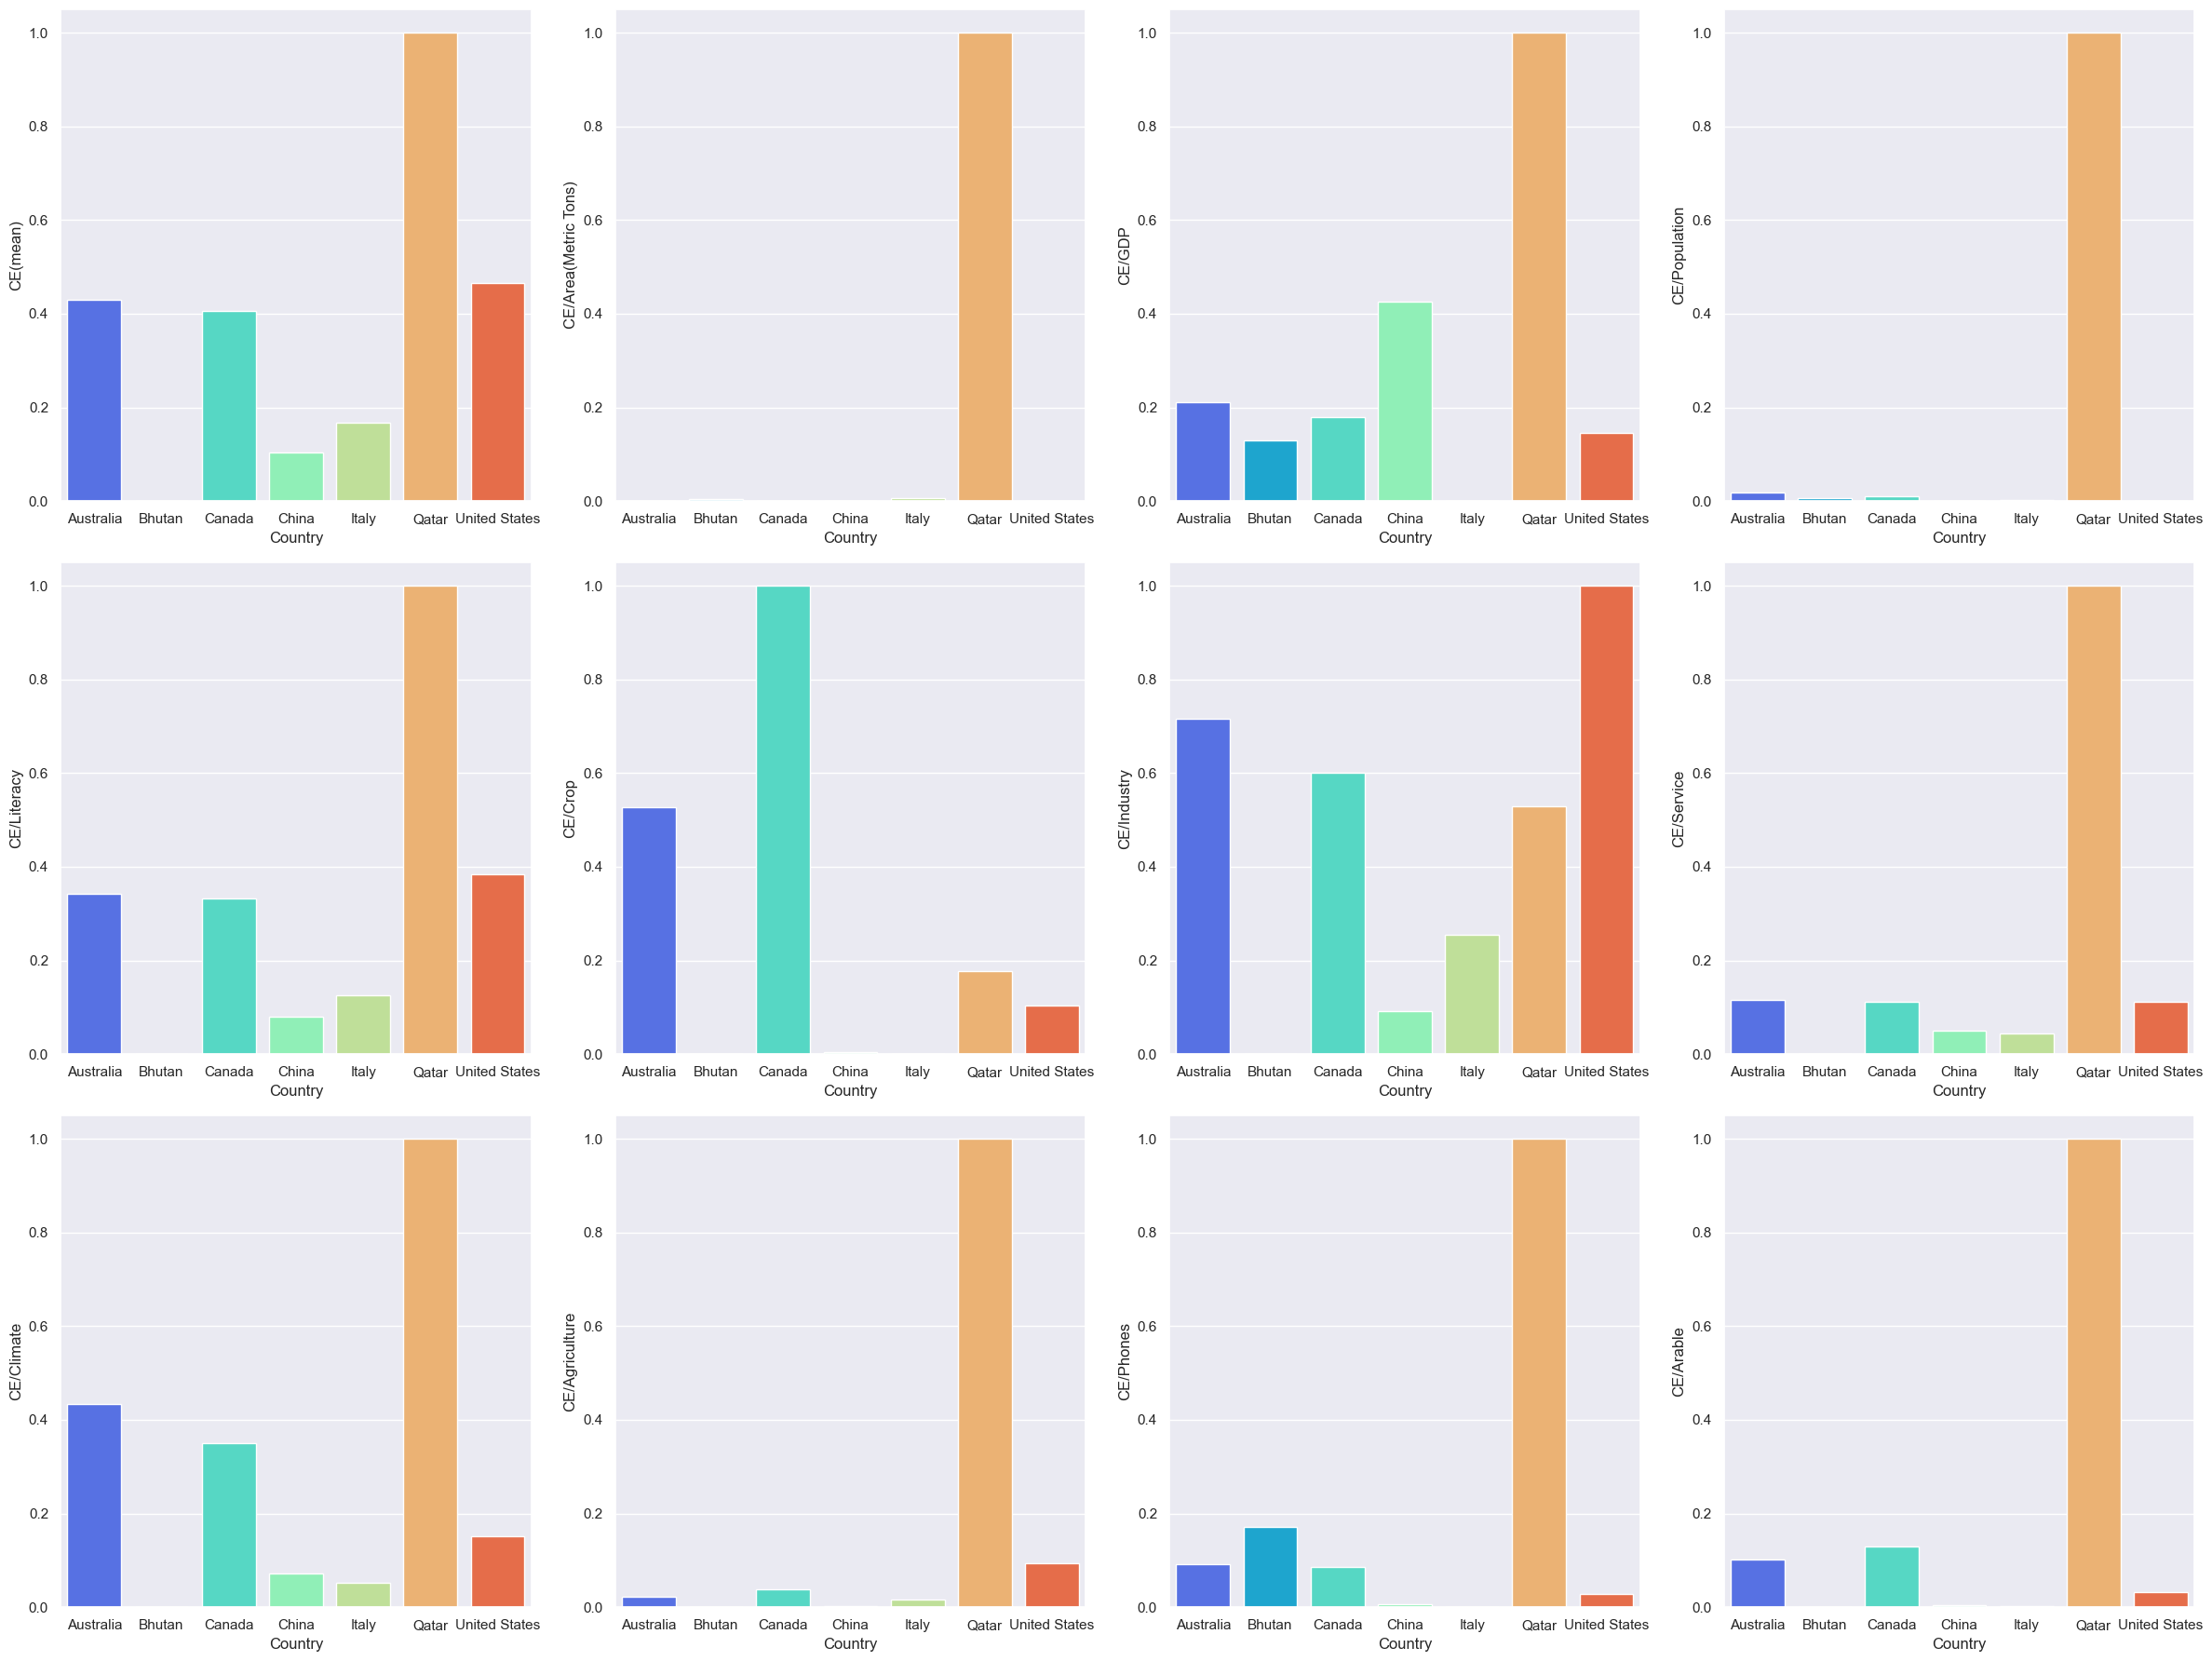

In [128]:
fig, axes = plt.subplots(3, 4, figsize=(24, 18))
sns.barplot(ax=axes[0, 0], data=analysis_df, x="Country", y="CE(mean)", palette="rainbow");
sns.barplot(ax=axes[0, 1], data=analysis_df, x="Country", y="CE/Area(Metric Tons)", palette="rainbow");
sns.barplot(ax=axes[0, 2], data=analysis_df, x="Country", y="CE/GDP", palette="rainbow");
sns.barplot(ax=axes[0, 3], data=analysis_df, x="Country", y="CE/Population", palette="rainbow");
sns.barplot(ax=axes[1, 0], data=analysis_df, x="Country", y="CE/Literacy", palette="rainbow");
sns.barplot(ax=axes[1, 1], data=analysis_df, x="Country", y="CE/Crop", palette="rainbow");
sns.barplot(ax=axes[1, 2], data=analysis_df, x="Country", y="CE/Industry", palette="rainbow");
sns.barplot(ax=axes[1, 3], data=analysis_df, x="Country", y="CE/Service", palette="rainbow");
sns.barplot(ax=axes[2, 0], data=analysis_df, x="Country", y="CE/Climate", palette="rainbow");
sns.barplot(ax=axes[2, 1], data=analysis_df, x="Country", y="CE/Agriculture", palette="rainbow");
sns.barplot(ax=axes[2, 2], data=analysis_df, x="Country", y="CE/Phones", palette="rainbow");
sns.barplot(ax=axes[2, 3], data=analysis_df, x="Country", y="CE/Arable", palette="rainbow");
plt.tight_layout()

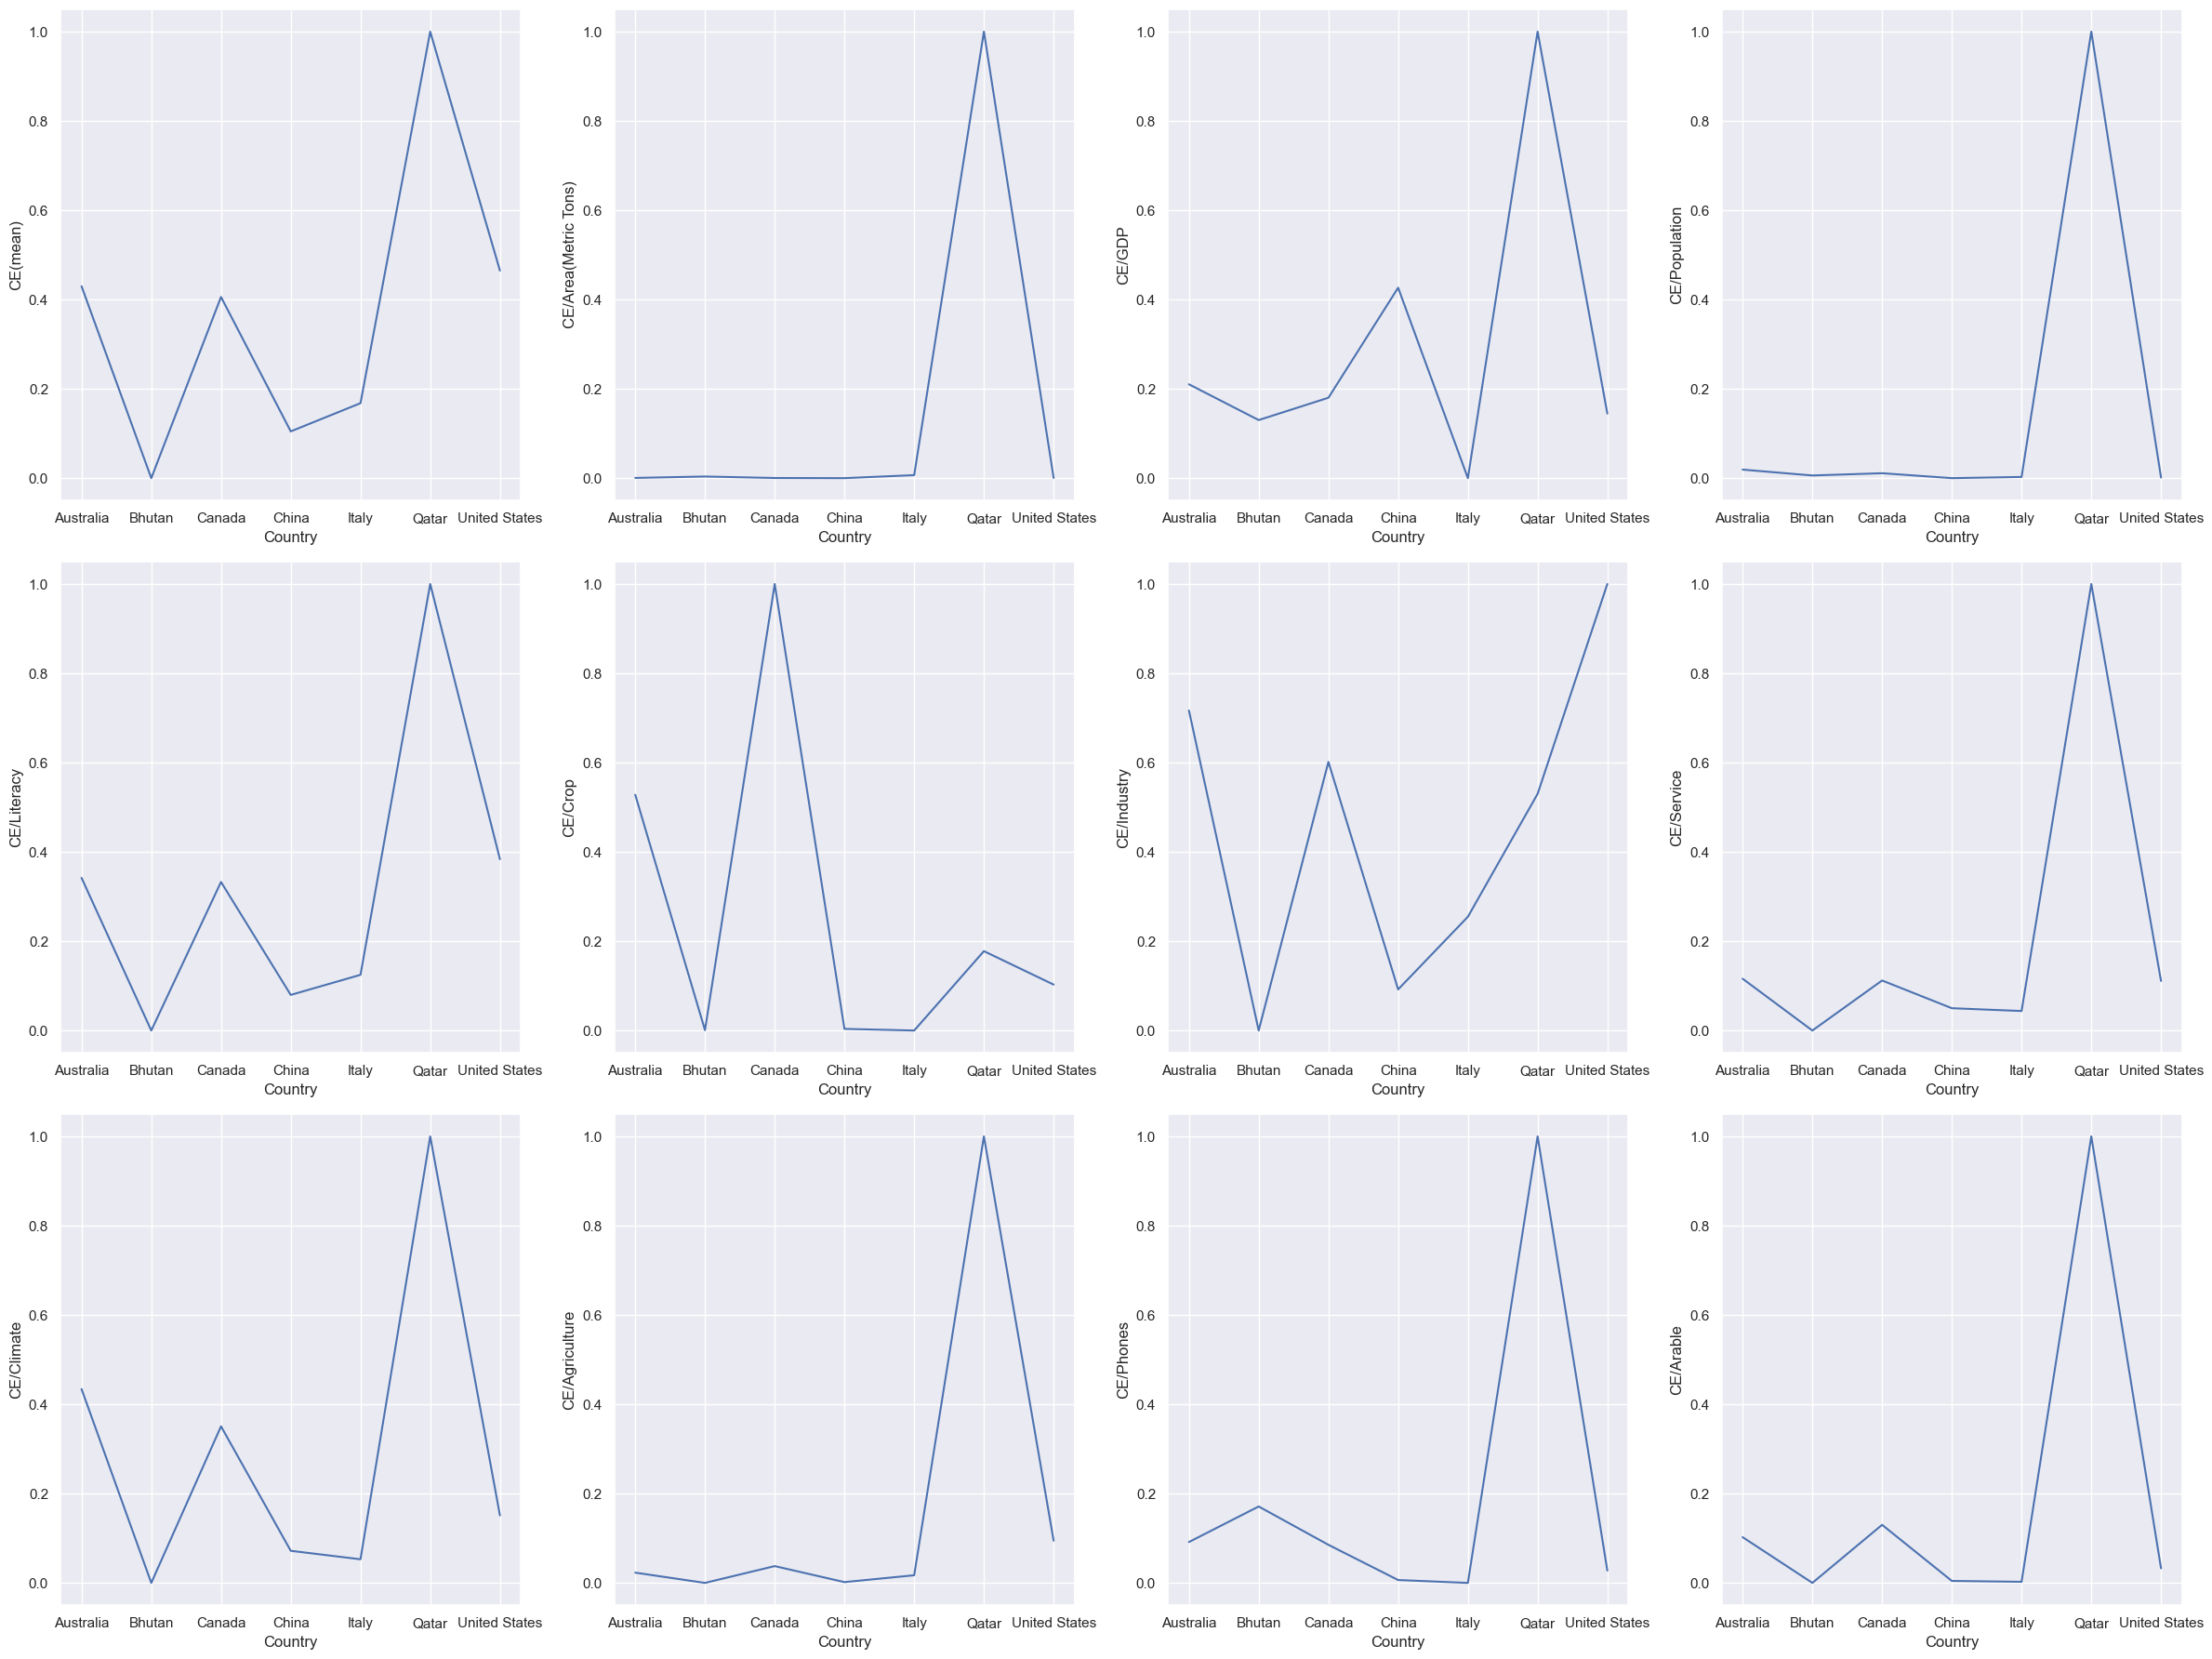

In [130]:
fig, axes = plt.subplots(3, 4, figsize=(24, 18))
sns.lineplot(ax=axes[0, 0], data=analysis_df, x="Country", y="CE(mean)");
sns.lineplot(ax=axes[0, 1], data=analysis_df, x="Country", y="CE/Area(Metric Tons)");
sns.lineplot(ax=axes[0, 2], data=analysis_df, x="Country", y="CE/GDP");
sns.lineplot(ax=axes[0, 3], data=analysis_df, x="Country", y="CE/Population");
sns.lineplot(ax=axes[1, 0], data=analysis_df, x="Country", y="CE/Literacy");
sns.lineplot(ax=axes[1, 1], data=analysis_df, x="Country", y="CE/Crop");
sns.lineplot(ax=axes[1, 2], data=analysis_df, x="Country", y="CE/Industry");
sns.lineplot(ax=axes[1, 3], data=analysis_df, x="Country", y="CE/Service");
sns.lineplot(ax=axes[2, 0], data=analysis_df, x="Country", y="CE/Climate");
sns.lineplot(ax=axes[2, 1], data=analysis_df, x="Country", y="CE/Agriculture");
sns.lineplot(ax=axes[2, 2], data=analysis_df, x="Country", y="CE/Phones");
sns.lineplot(ax=axes[2, 3], data=analysis_df, x="Country", y="CE/Arable");
plt.tight_layout()